## CAMELS Denmark

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CAMELS_DK.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CAMELS_DK.ipynb)


This notebook explores CAMELS Denmark dataset.

In [1]:
from ai4water.eda import EDA
from ai4water.datasets import CAMELS_DK
from ai4water.utils.utils import get_version_info

import pandas as pd

import matplotlib.pyplot as plt

from easy_mpl import scatter
from easy_mpl import hist
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [3]:
dataset = CAMELS_DK(
     path=r"E:\data\gscad\CAMELS\CAMELS_DK"    # set path to None if you have not already downloaded data
)



    Not downloading the data since the directory 
    E:\data\gscad\CAMELS\CAMELS_DK already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
dataset.start

Timestamp('1981-01-02 00:00:00')

In [5]:
dataset.end

Timestamp('2020-12-31 00:00:00')

In [6]:
stations = dataset.stations()
len(stations)

308

### Static Data

In [7]:
dataset.static_features

['p_mean',
 'pet_mean',
 'aridity',
 'frac_snow',
 'moisture_index',
 'seasonality',
 'high_prec_freq',
 'high_prec_dur',
 'low_prec_freq',
 'low_prec_dur',
 'gauge_name',
 'country',
 'gauge_lat',
 'gauge_lon',
 'area',
 'sgr_dk_sav',
 'glc_pc_s06',
 'glc_pc_s07',
 'nli_ix_sav',
 'glc_pc_s04',
 'glc_pc_s05',
 'glc_pc_s02',
 'glc_pc_s03',
 'glc_pc_s01',
 'pet_mm_syr',
 'glc_pc_s08',
 'glc_pc_s09',
 'swc_pc_s09',
 'ele_mt_smx',
 'tbi_cl_smj',
 'swc_pc_s01',
 'swc_pc_s02',
 'swc_pc_s03',
 'swc_pc_s04',
 'swc_pc_s05',
 'swc_pc_s06',
 'swc_pc_s07',
 'swc_pc_s08',
 'crp_pc_sse',
 'glc_pc_s22',
 'glc_pc_s20',
 'glc_pc_s21',
 'wet_pc_sg1',
 'wet_pc_sg2',
 'pac_pc_sse',
 'swc_pc_s10',
 'swc_pc_s11',
 'swc_pc_s12',
 'clz_cl_smj',
 'gwt_cm_sav',
 'glc_pc_s17',
 'glc_pc_s18',
 'hft_ix_s93',
 'glc_pc_s15',
 'ire_pc_sse',
 'glc_pc_s16',
 'glc_pc_s13',
 'prm_pc_sse',
 'glc_pc_s14',
 'glc_pc_s11',
 'glc_pc_s12',
 'glc_pc_s10',
 'kar_pc_sse',
 'slp_dg_sav',
 'glc_pc_s19',
 'tmp_dc_s07',
 'tmp_dc_s08',

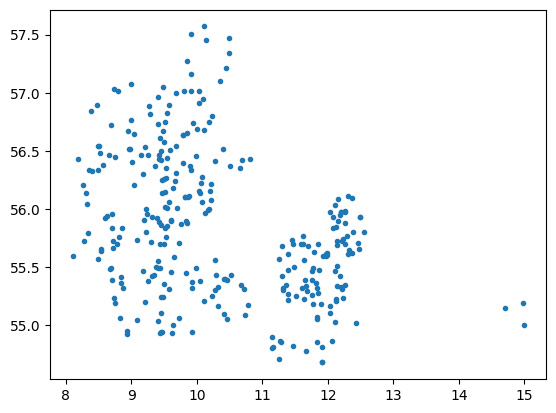

<AxesSubplot: >

In [10]:
dataset.plot_stations()

In [11]:
coords = dataset.stn_coords()
coords

lat      long
100006  56.82558   9.55018
100009  56.89105   9.57428
100010  57.01044   9.90870
100011  57.01597  10.02637
100013  56.96435   9.40853
...          ...       ...
80001   57.10371  10.35160
90001   57.01642   8.78869
90015   57.03193   8.73478
90021   57.04597   9.48887
90022   57.07303   8.98794

[308 rows x 2 columns]

In [12]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(308, 211)

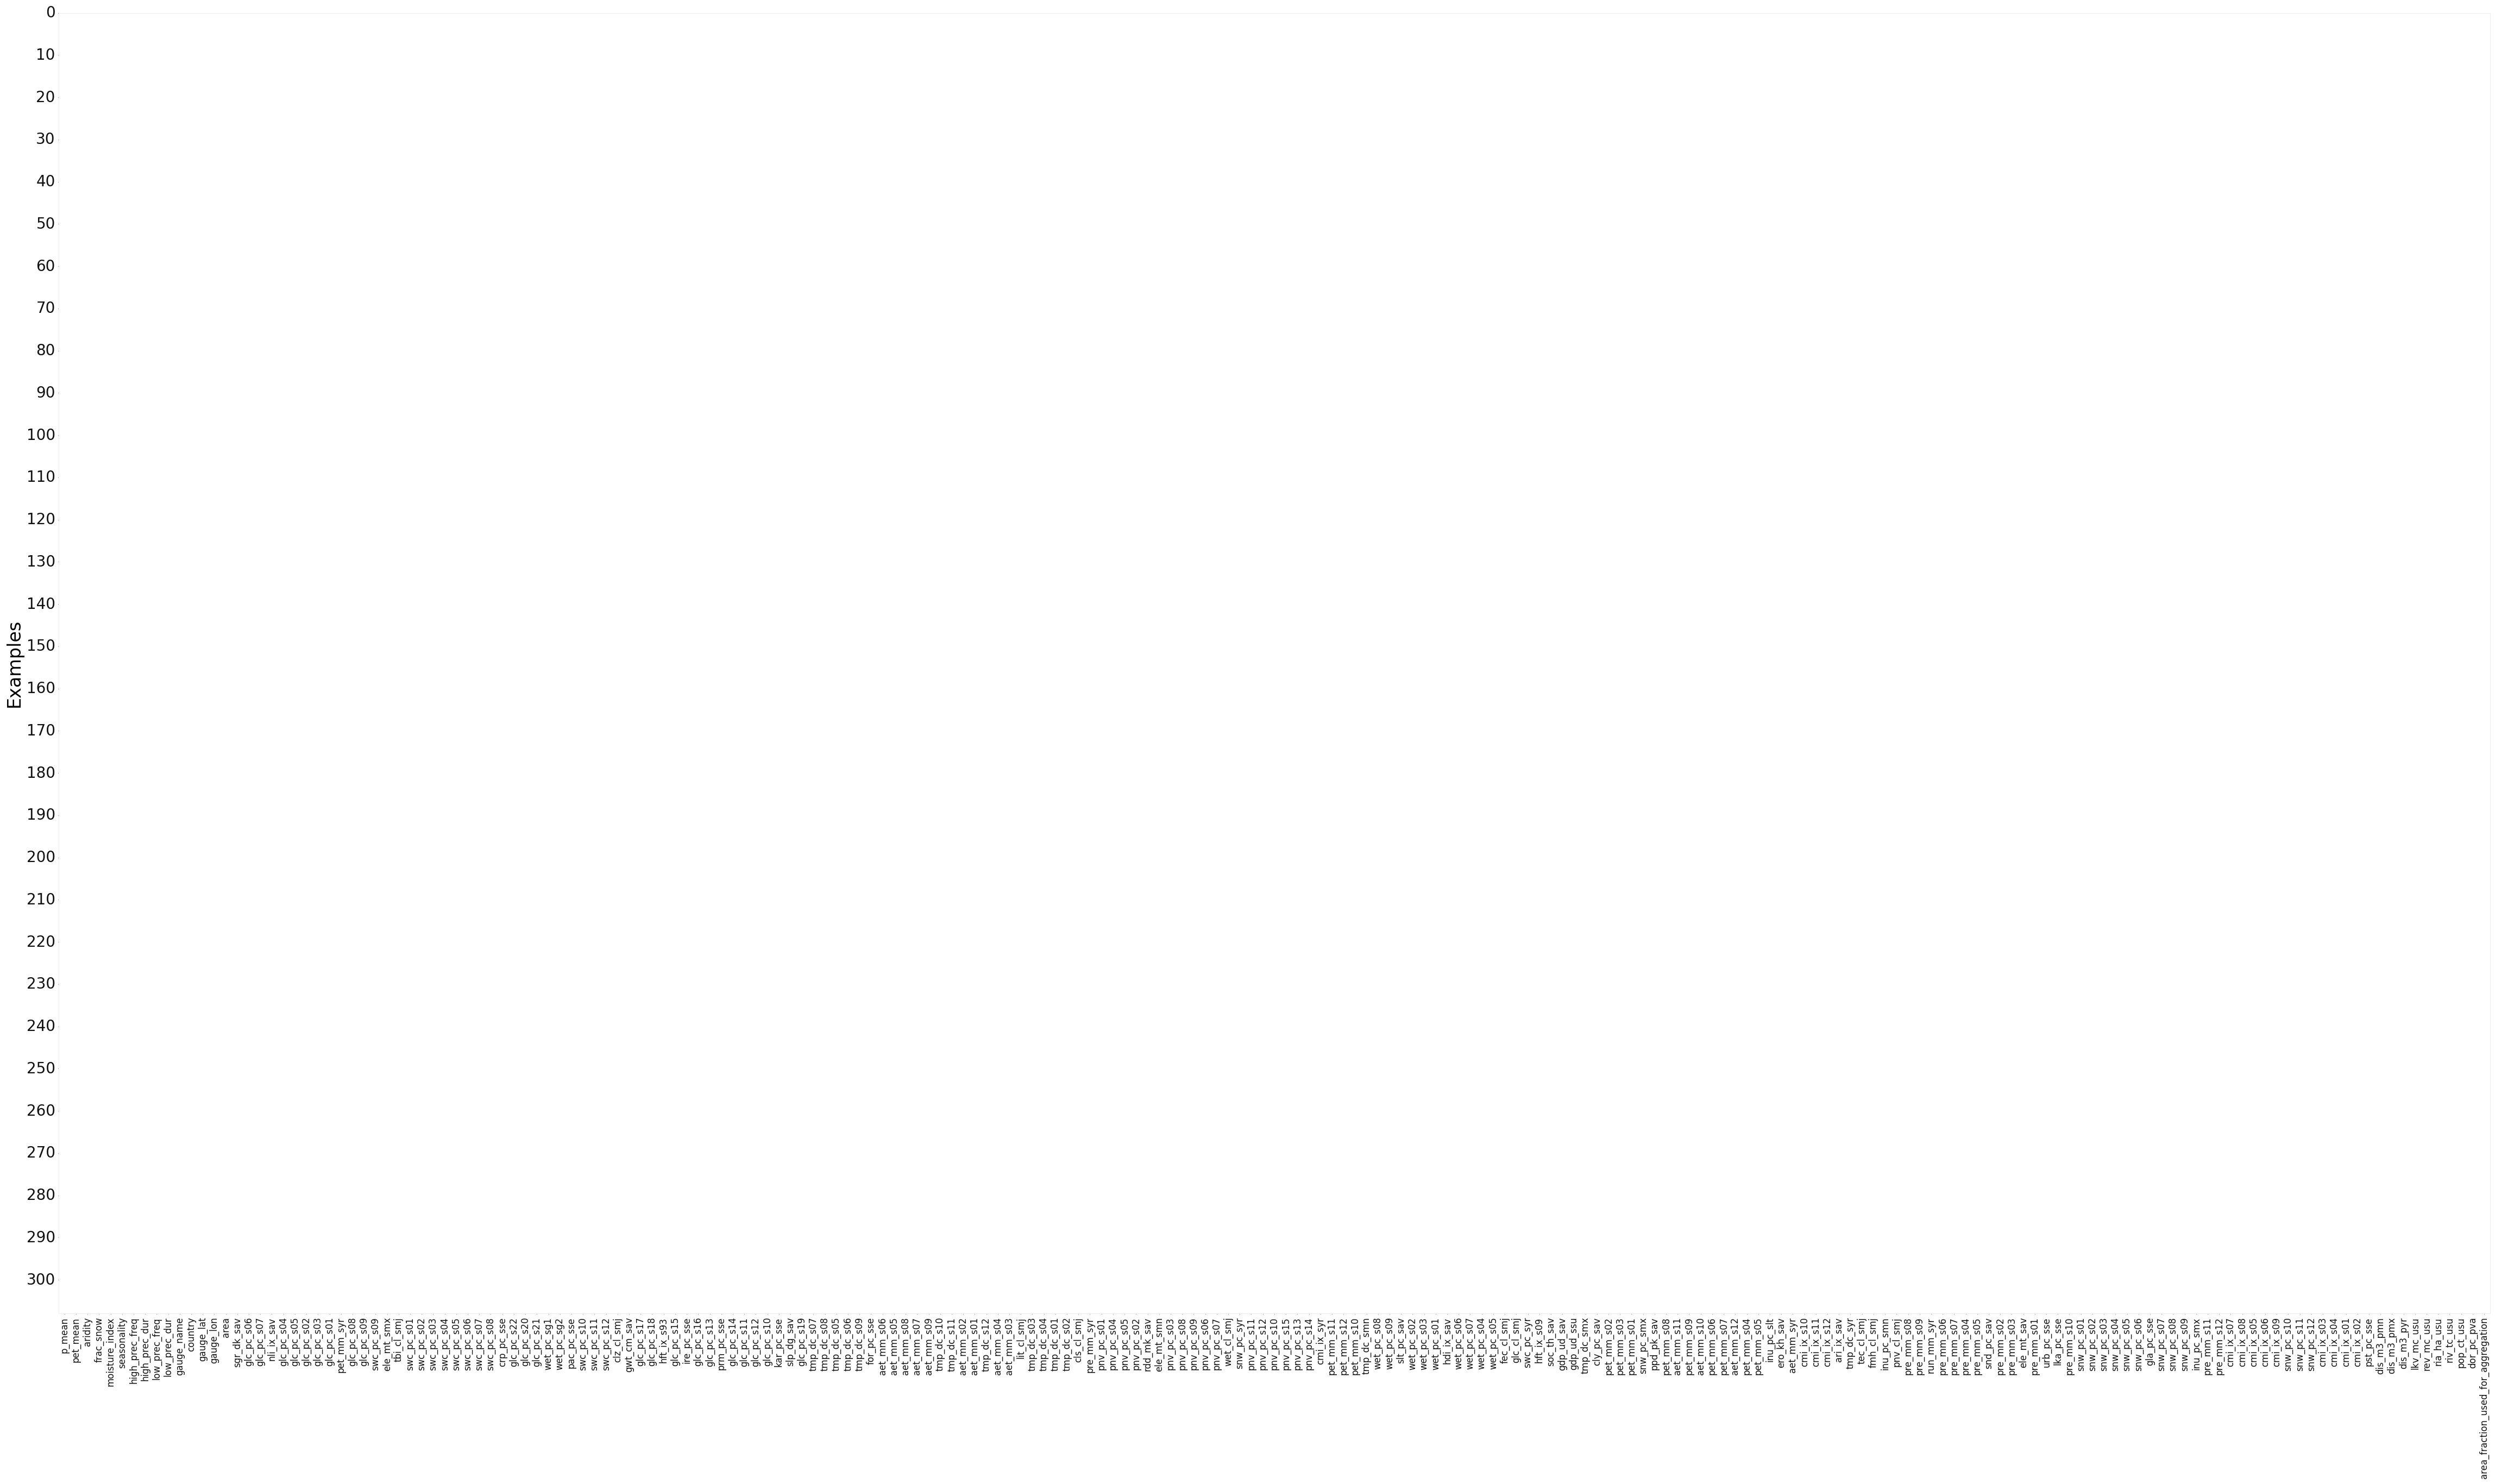

In [13]:
_ = EDA(data=static, save=False).heatmap()

In [14]:
static = static.dropna(axis=1)
static.shape

(308, 211)

In [15]:
physical_features = []
soil_features = []
geological_features = []
flow_characteristics = []

In [15]:
lat = static['gauge_lat'].values.reshape(-1,)
long = static['gauge_lon'].values.reshape(-1,)

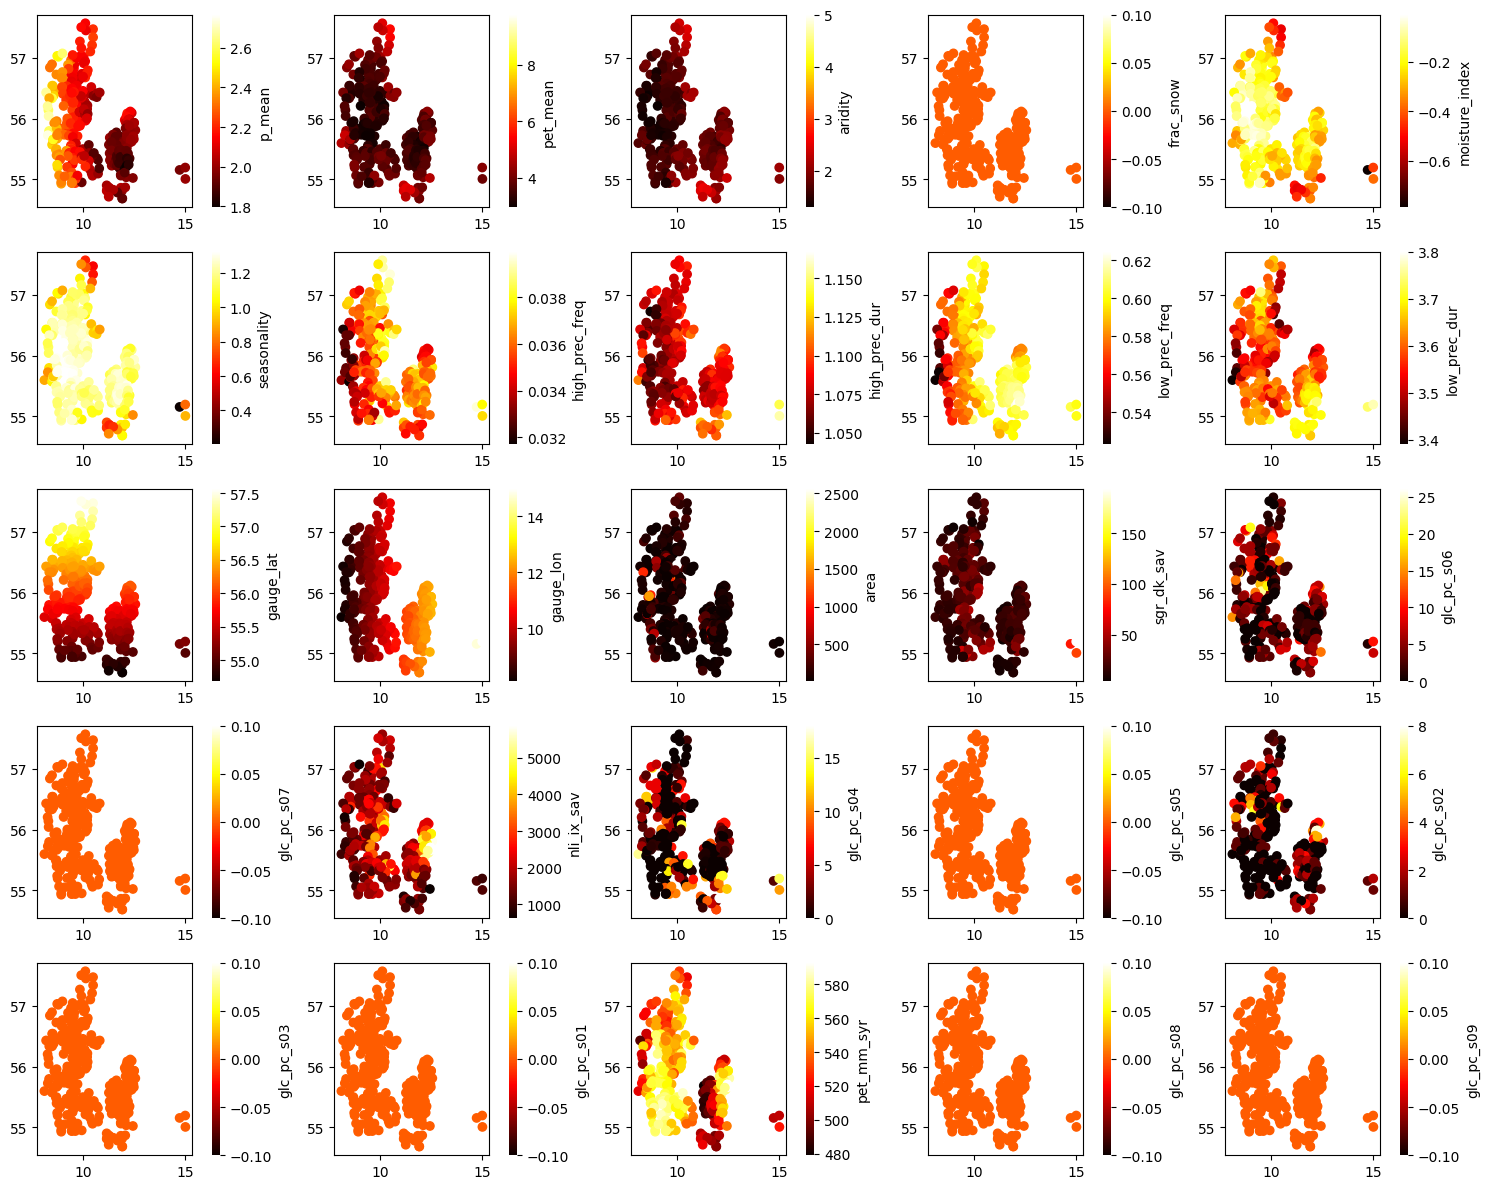

27


In [17]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

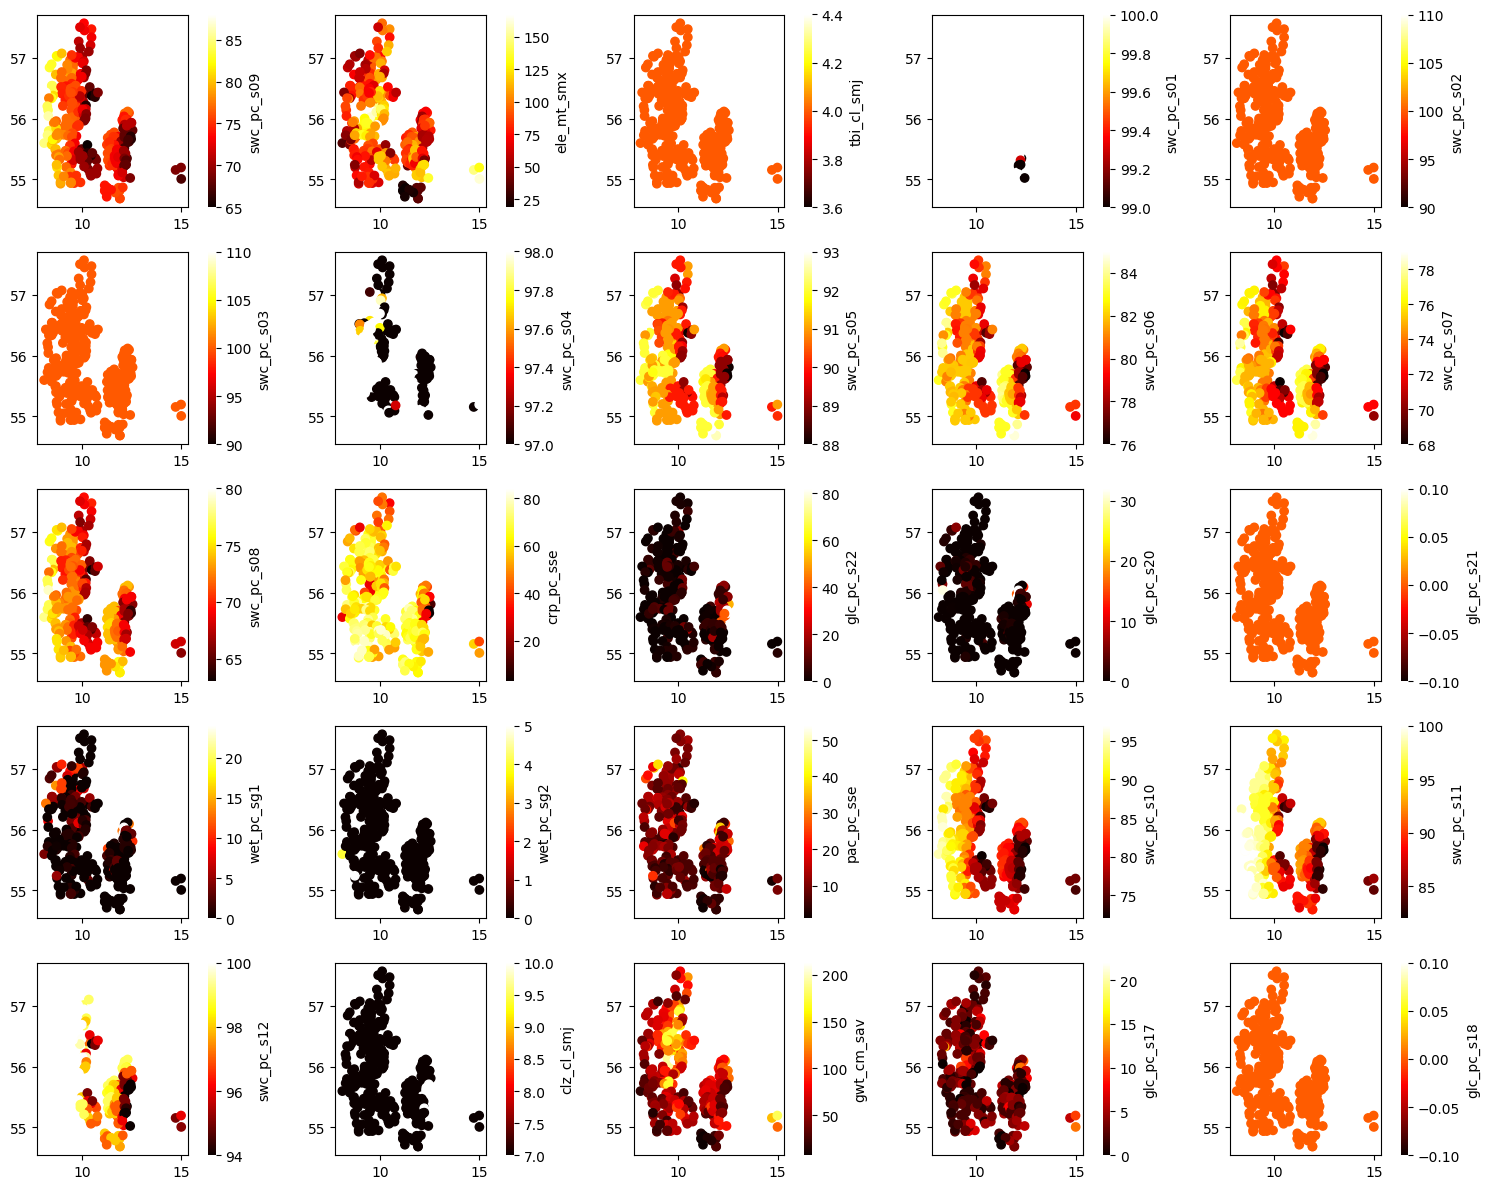

52


In [18]:
idx = 27
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

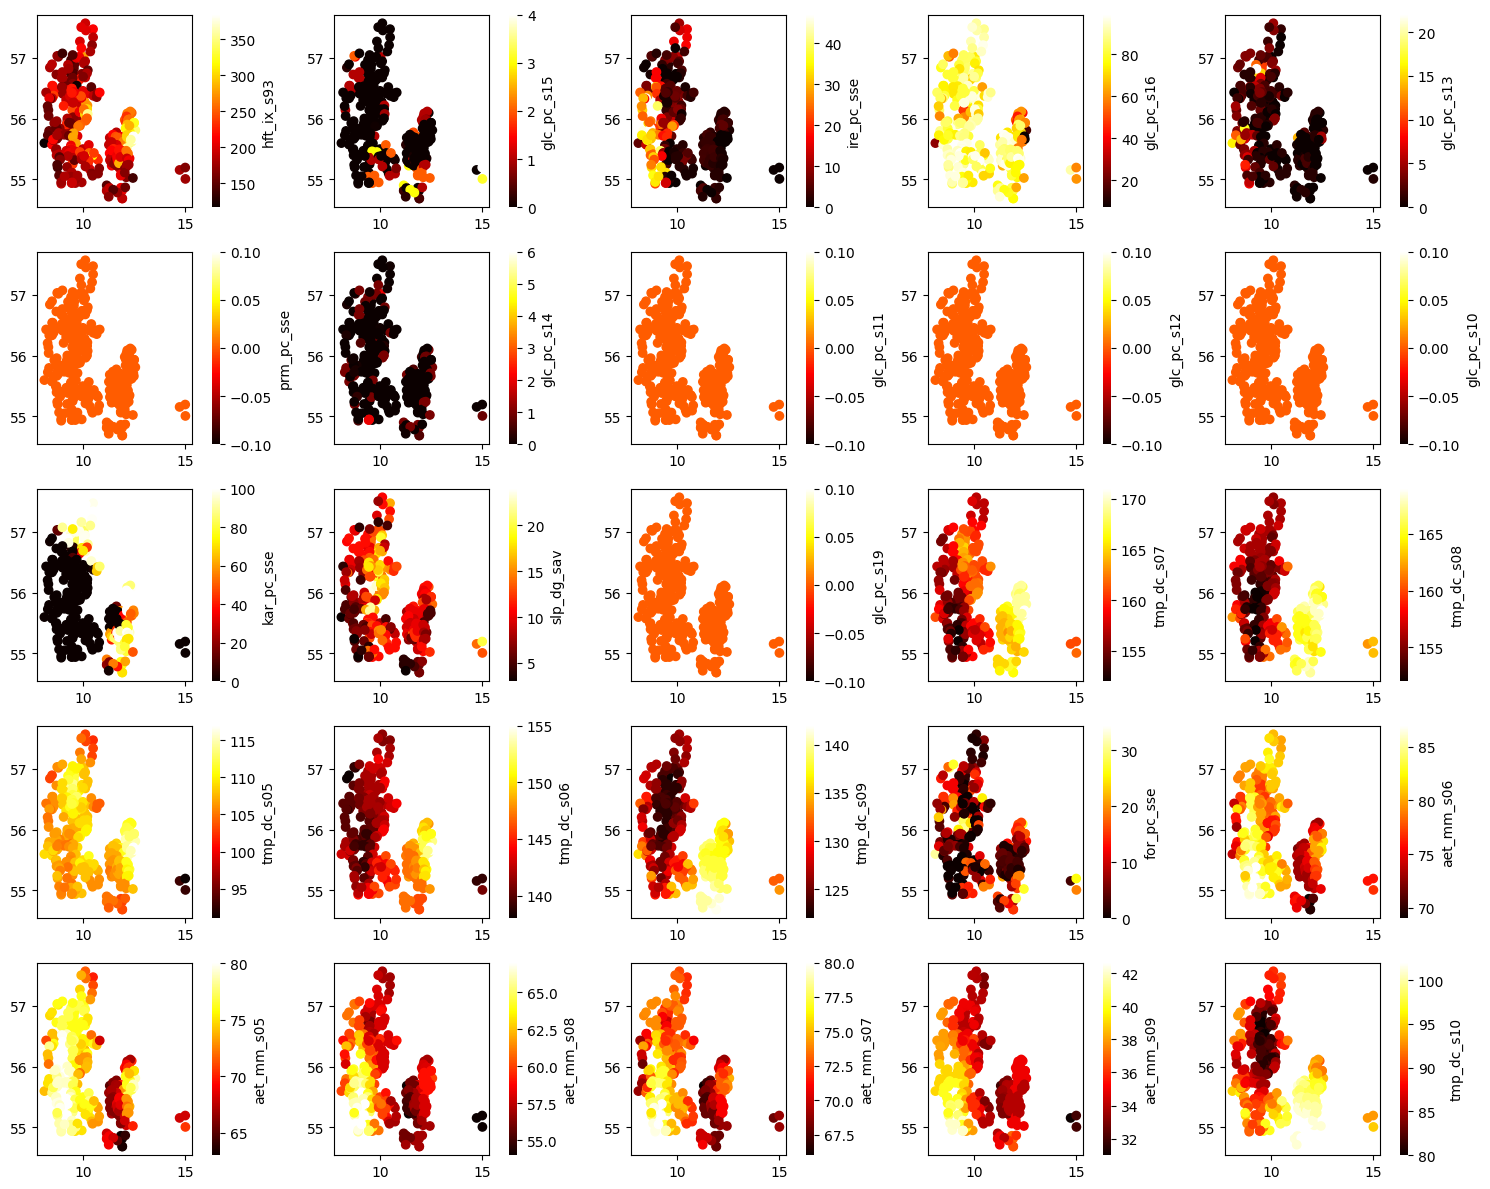

77


In [19]:
idx = 52
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

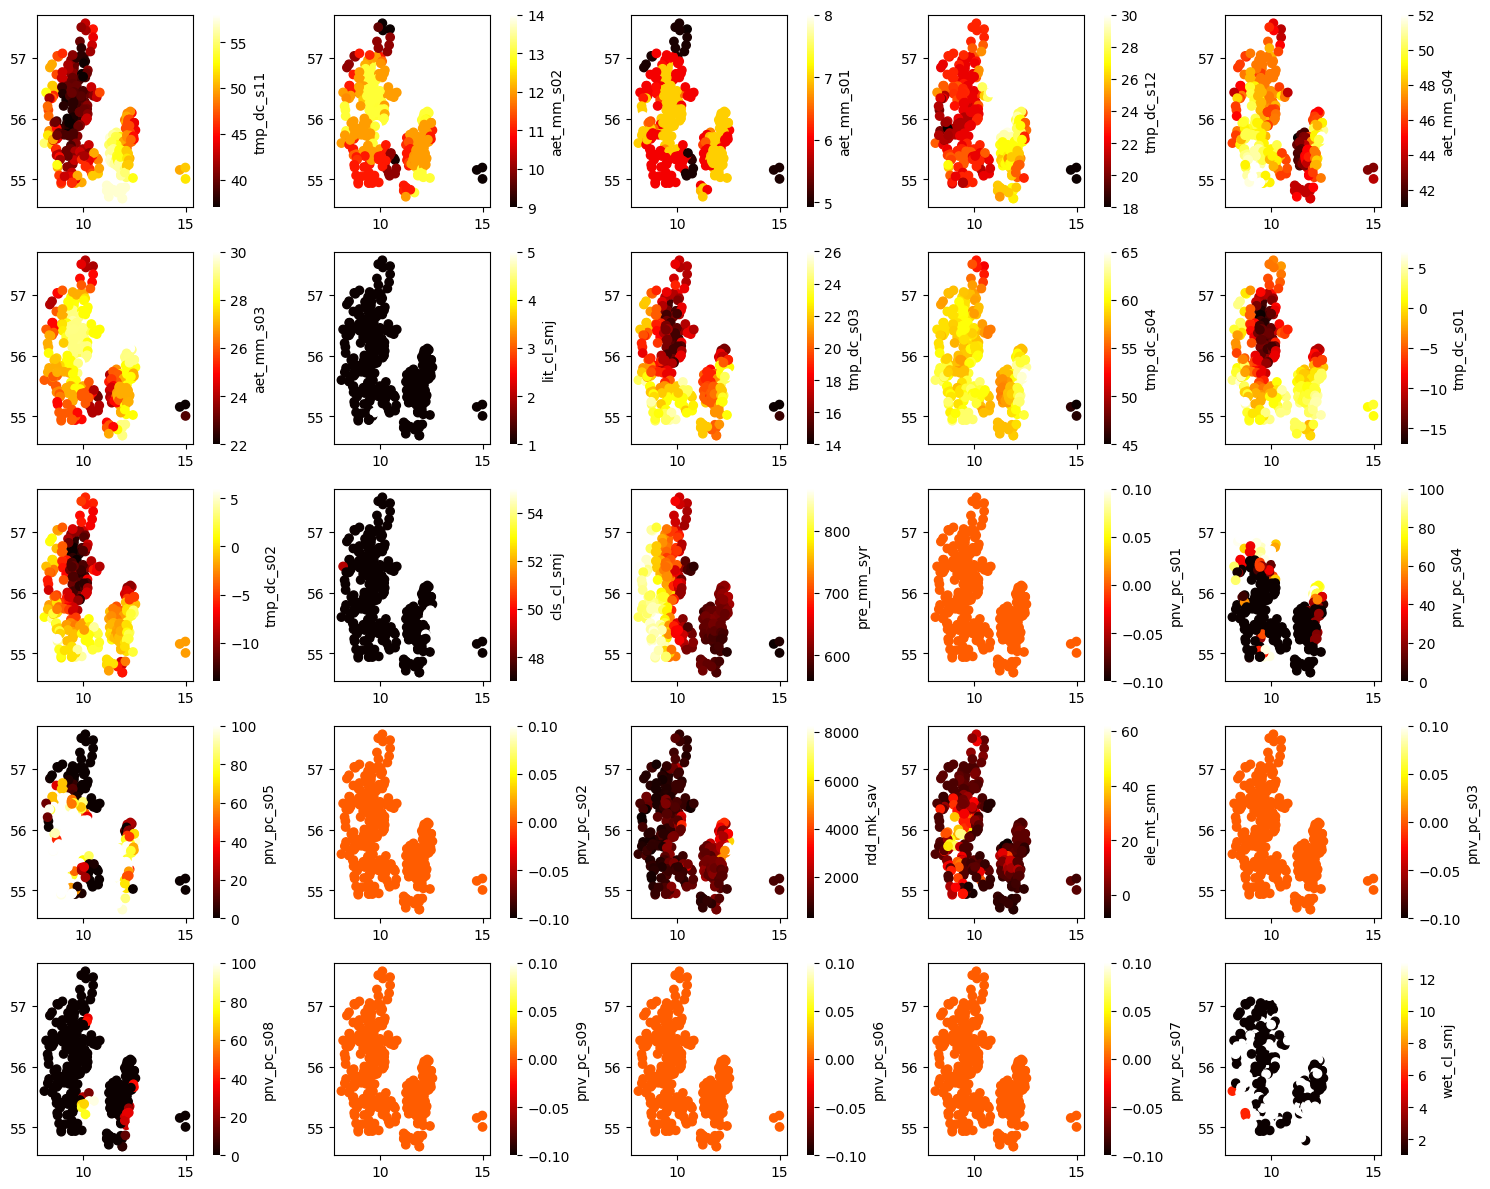

102


In [20]:
idx = 77
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

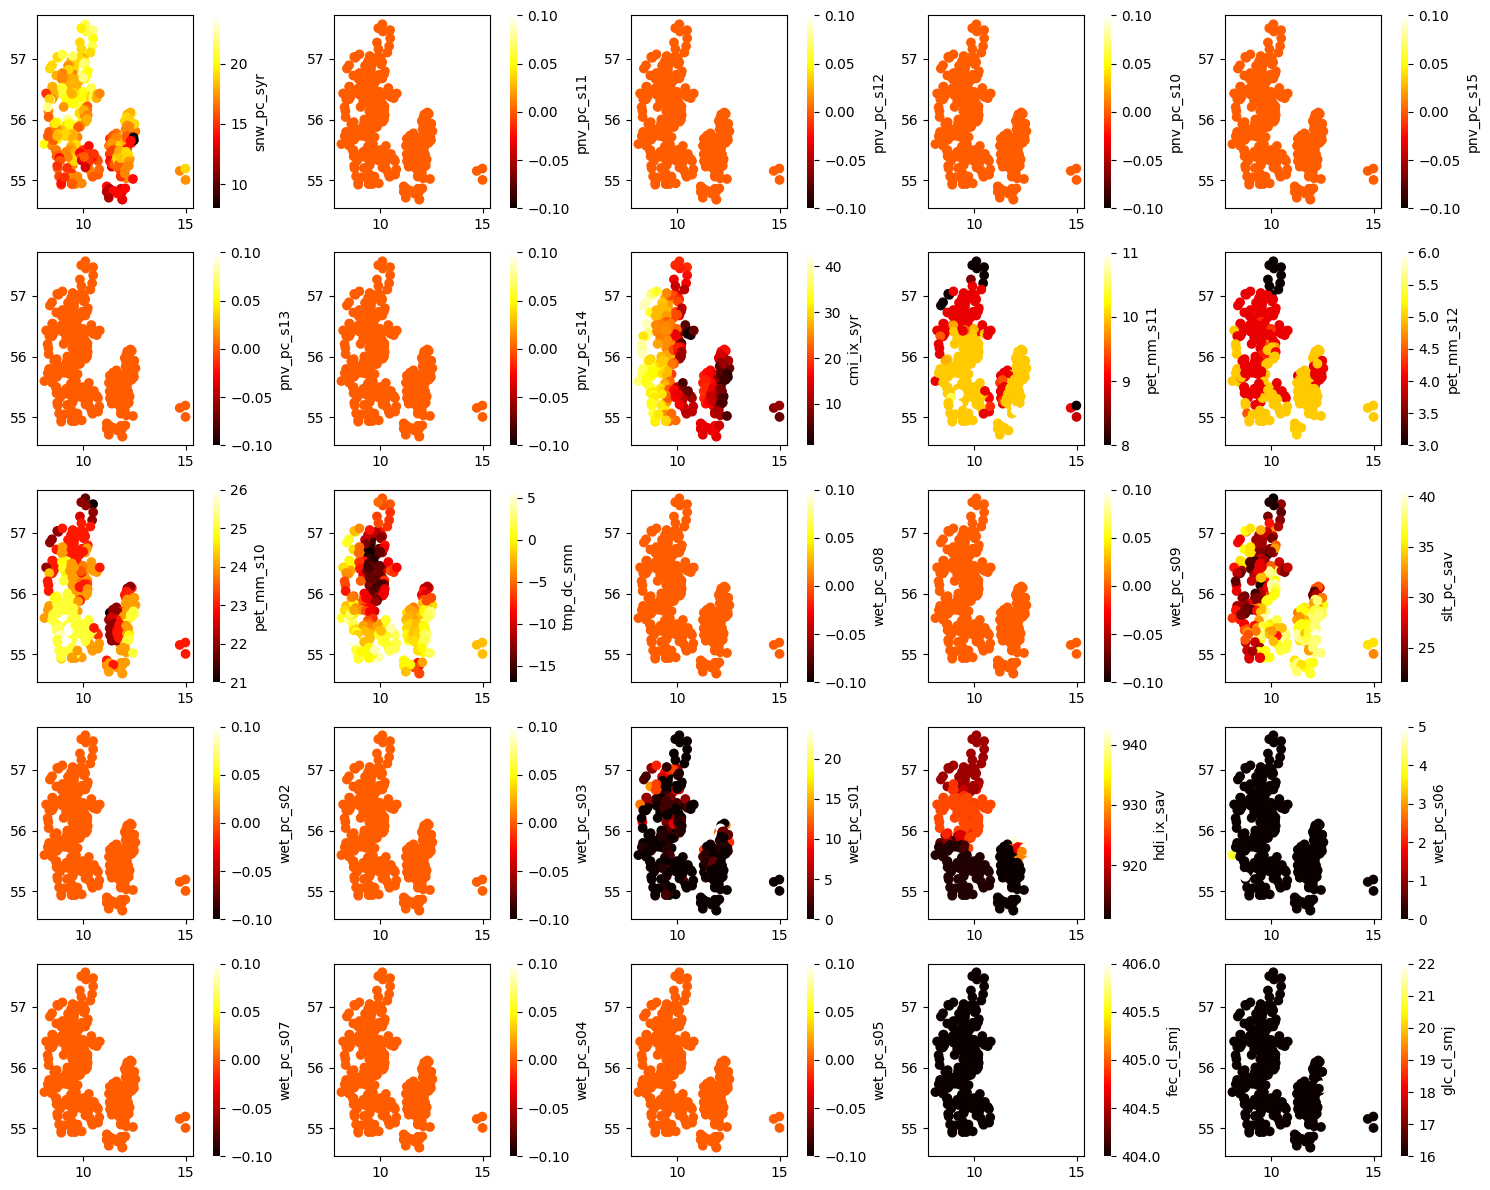

127


In [21]:
idx = 102
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

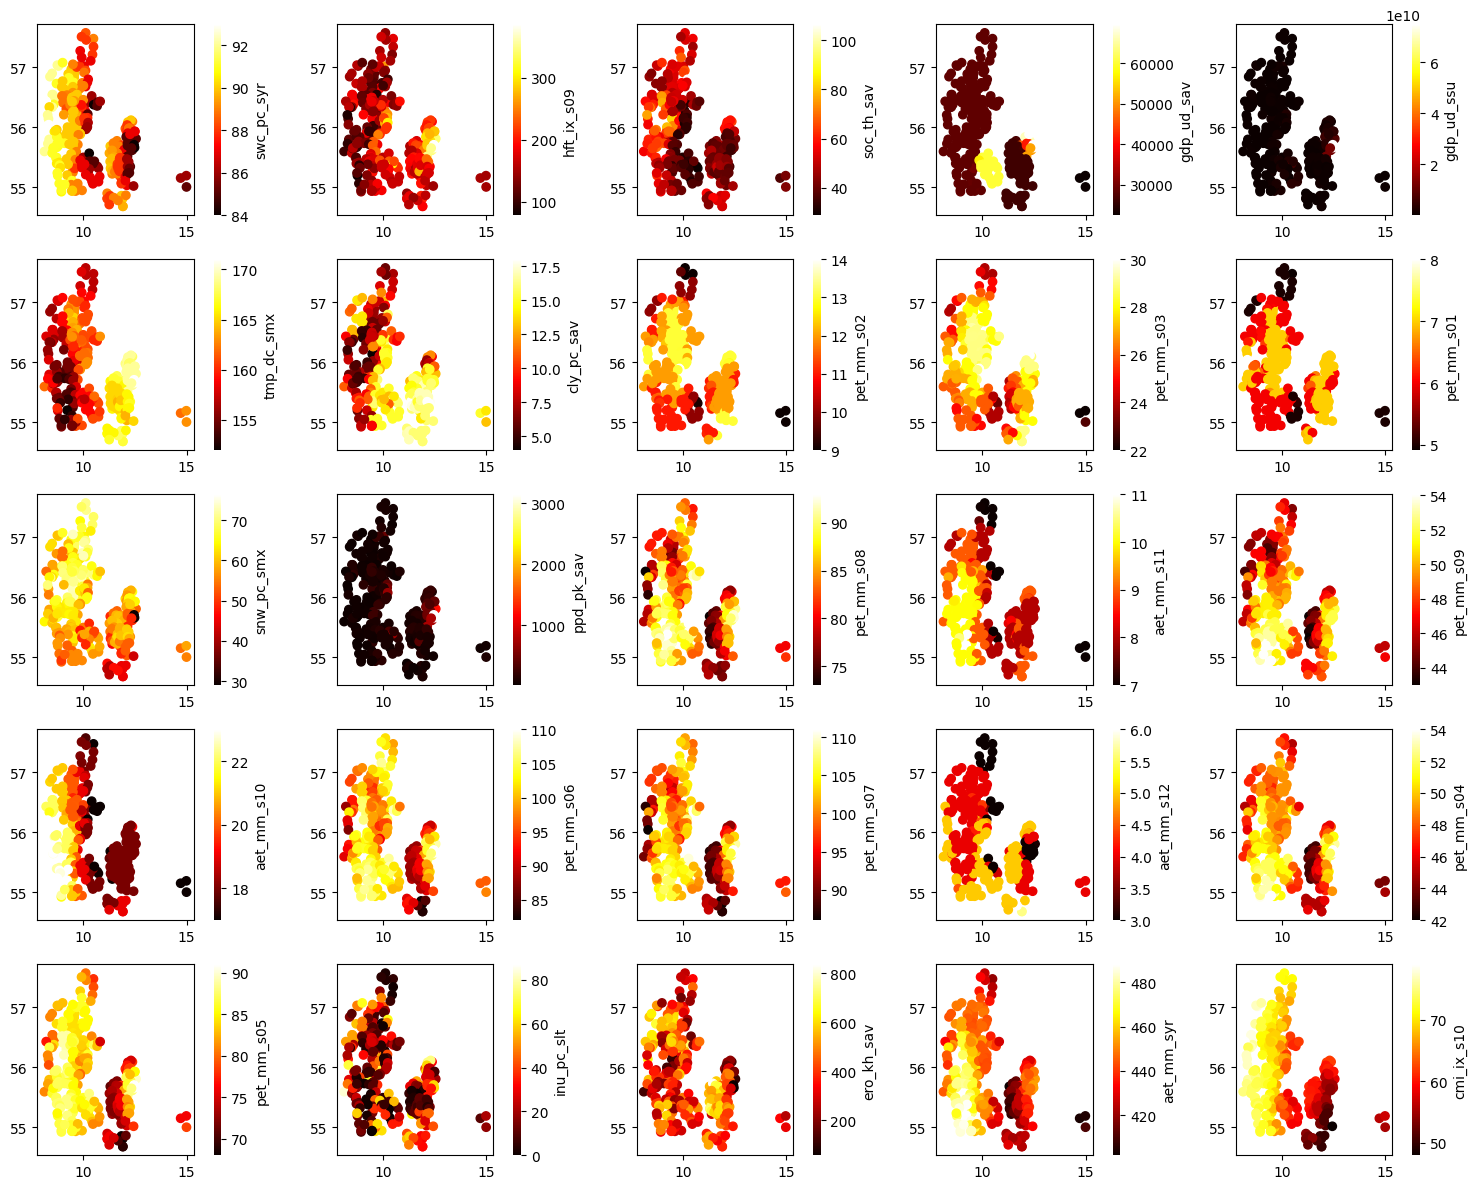

152


In [22]:
idx = 127
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

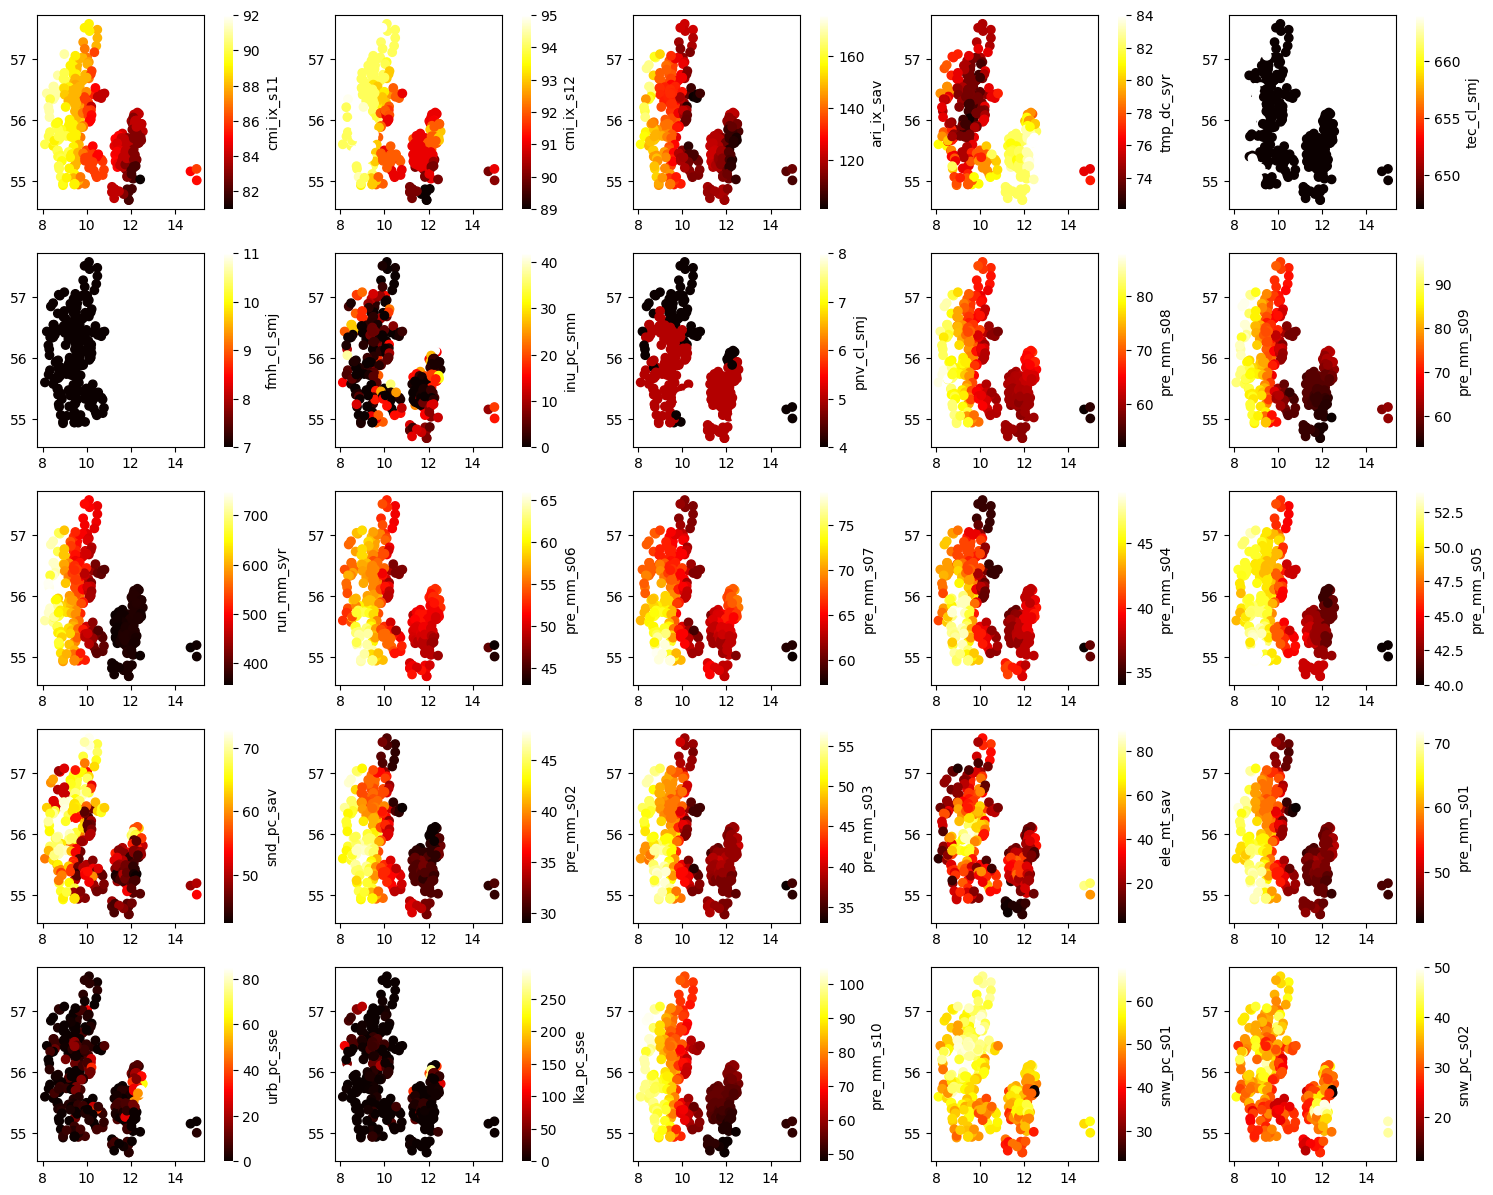

177


In [23]:
idx = 152
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

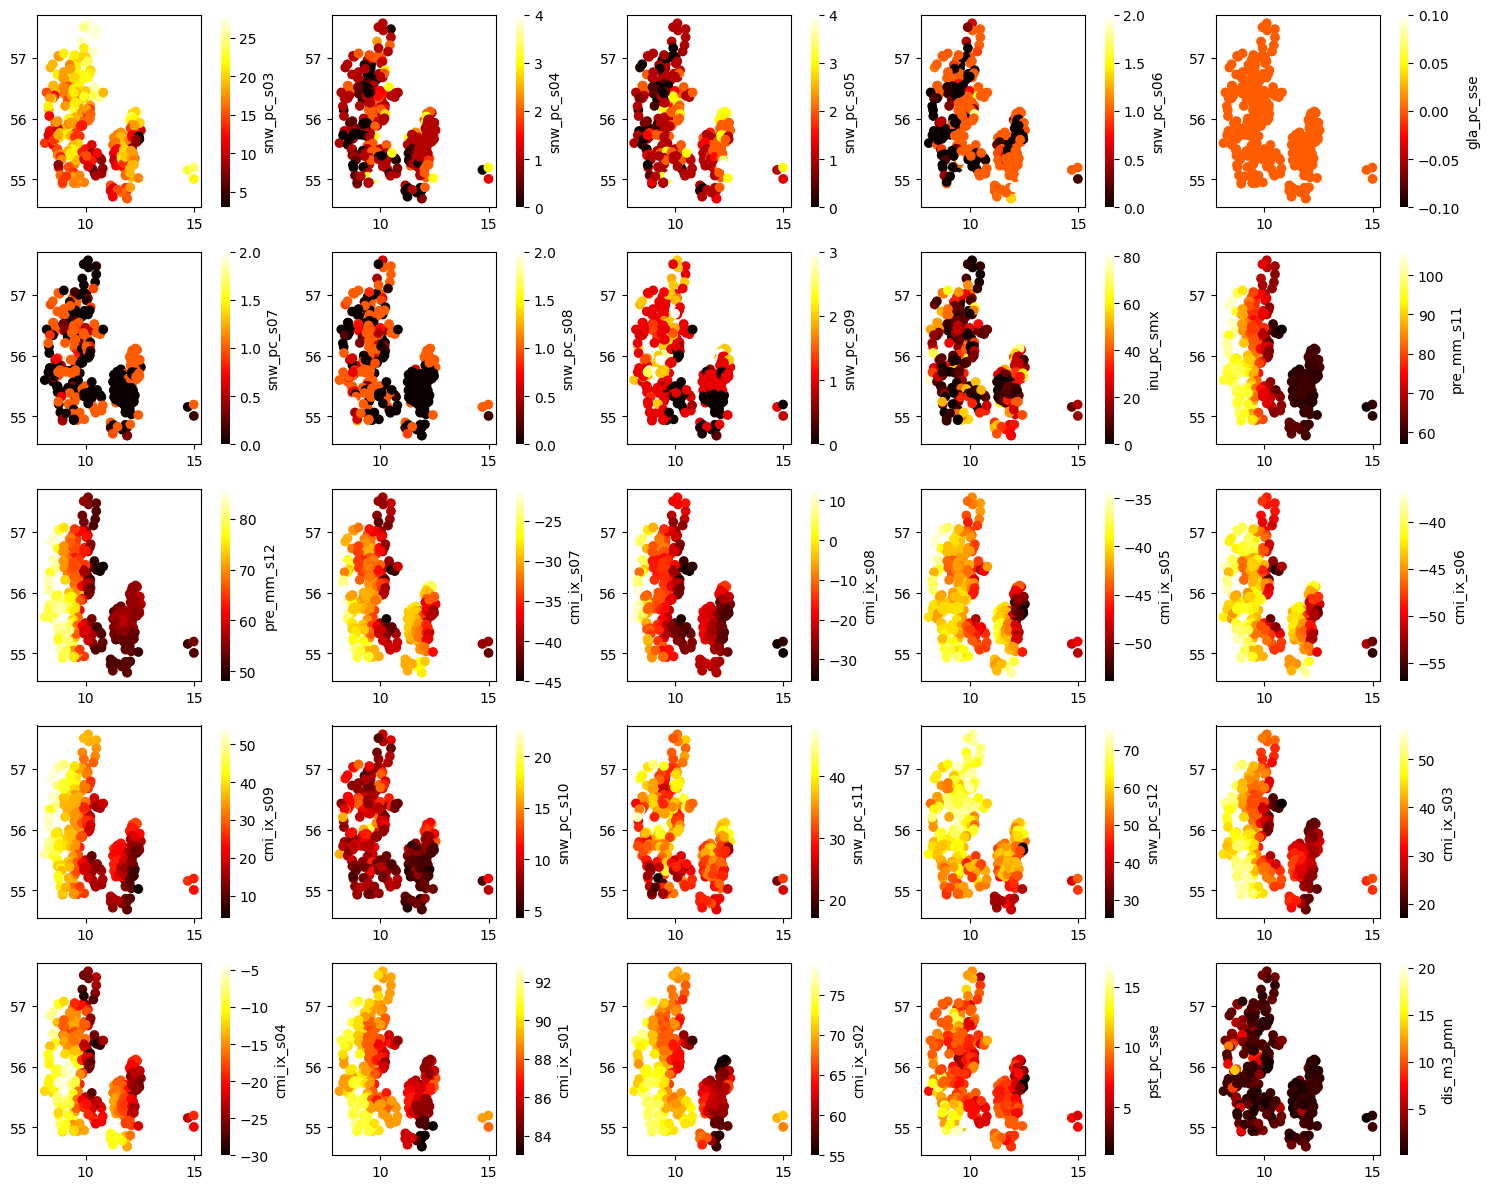

202


In [24]:
idx = 177
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        print(f"{val.name} is not converted to numeric")
        continue

plt.tight_layout()
plt.show()
print(idx)

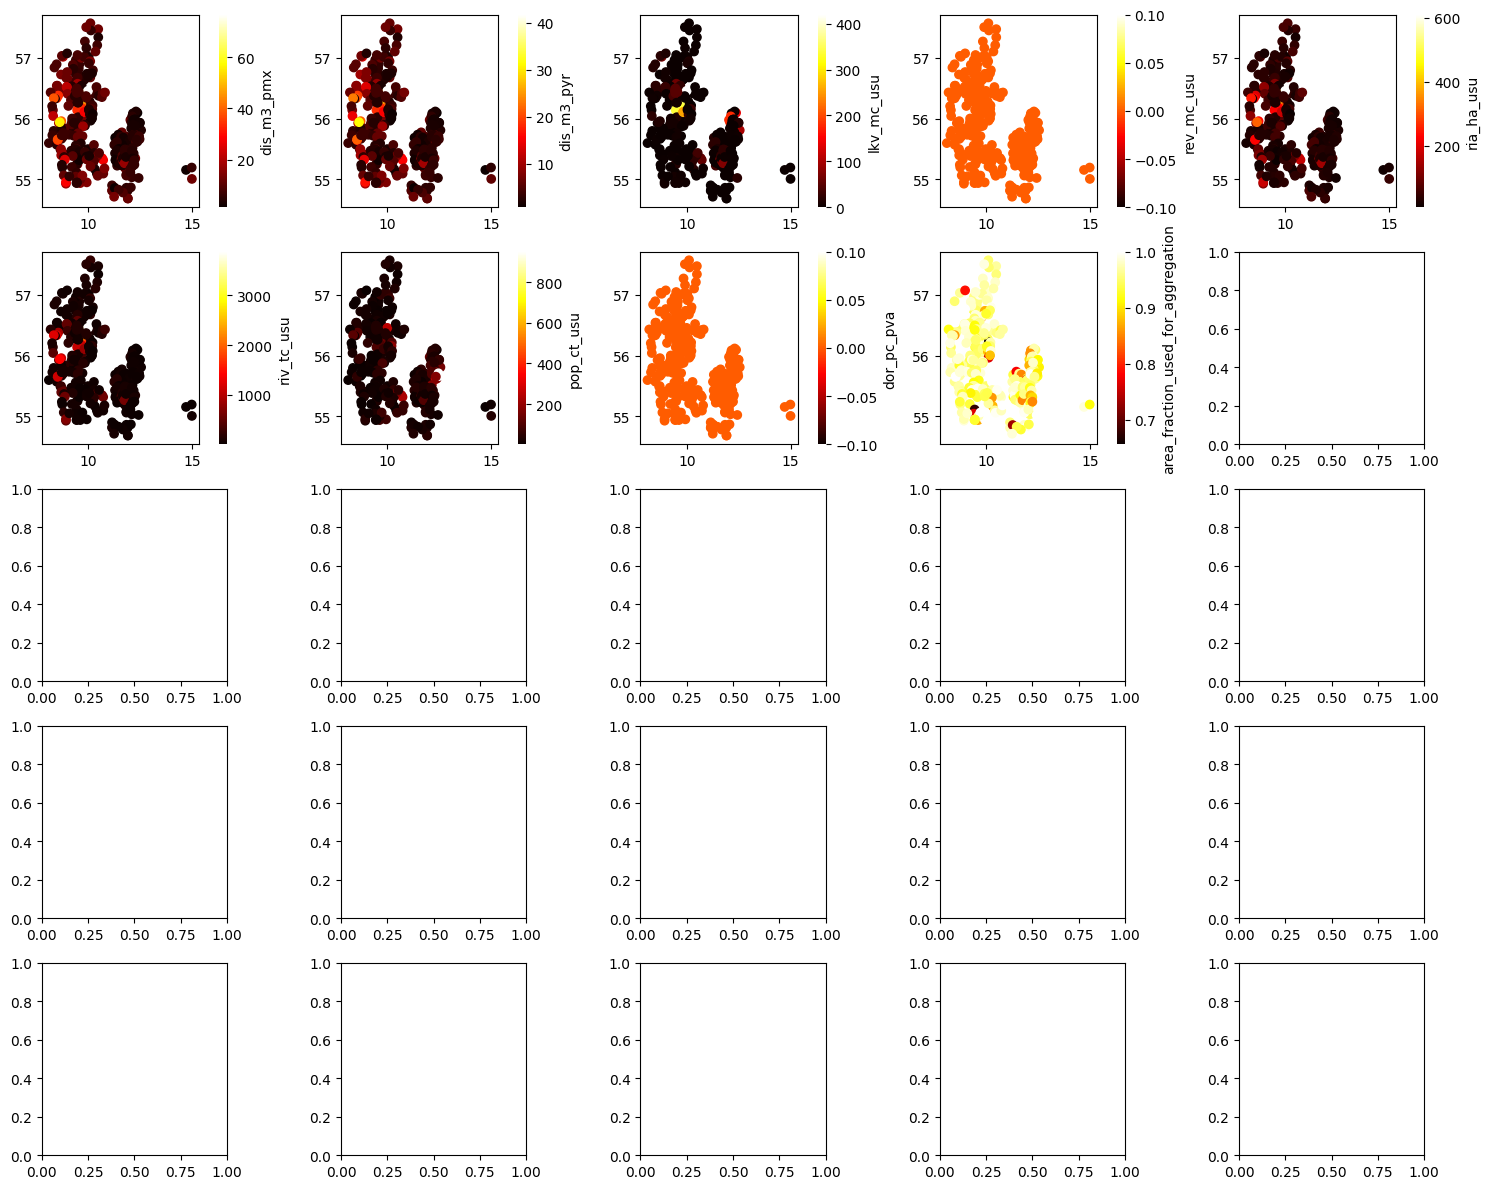

211


In [25]:
idx = 202
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        print(f"{val.name} is not converted to numeric")
        continue

plt.tight_layout()
plt.show()
print(idx)

### Dynamic Features

In [26]:
dataset.dynamic_features

['snow_depth_water_equivalent_mean',
 'surface_net_solar_radiation_mean',
 'surface_net_thermal_radiation_mean',
 'surface_pressure_mean',
 'temperature_2m_mean',
 'dewpoint_temperature_2m_mean',
 'u_component_of_wind_10m_mean',
 'v_component_of_wind_10m_mean',
 'volumetric_soil_water_layer_1_mean',
 'volumetric_soil_water_layer_2_mean',
 'volumetric_soil_water_layer_3_mean',
 'volumetric_soil_water_layer_4_mean',
 'snow_depth_water_equivalent_min',
 'surface_net_solar_radiation_min',
 'surface_net_thermal_radiation_min',
 'surface_pressure_min',
 'temperature_2m_min',
 'dewpoint_temperature_2m_min',
 'u_component_of_wind_10m_min',
 'v_component_of_wind_10m_min',
 'volumetric_soil_water_layer_1_min',
 'volumetric_soil_water_layer_2_min',
 'volumetric_soil_water_layer_3_min',
 'volumetric_soil_water_layer_4_min',
 'snow_depth_water_equivalent_max',
 'surface_net_solar_radiation_max',
 'surface_net_thermal_radiation_max',
 'surface_pressure_max',
 'temperature_2m_max',
 'dewpoint_tempera

In [27]:
# what is u and v component ???
# unit of streamflow ???
# what is sum in potential evapotranspiration ???

#### Streamflow

In [28]:
streamflow = dataset.q_mmd()
print(streamflow.shape)


(14609, 308)


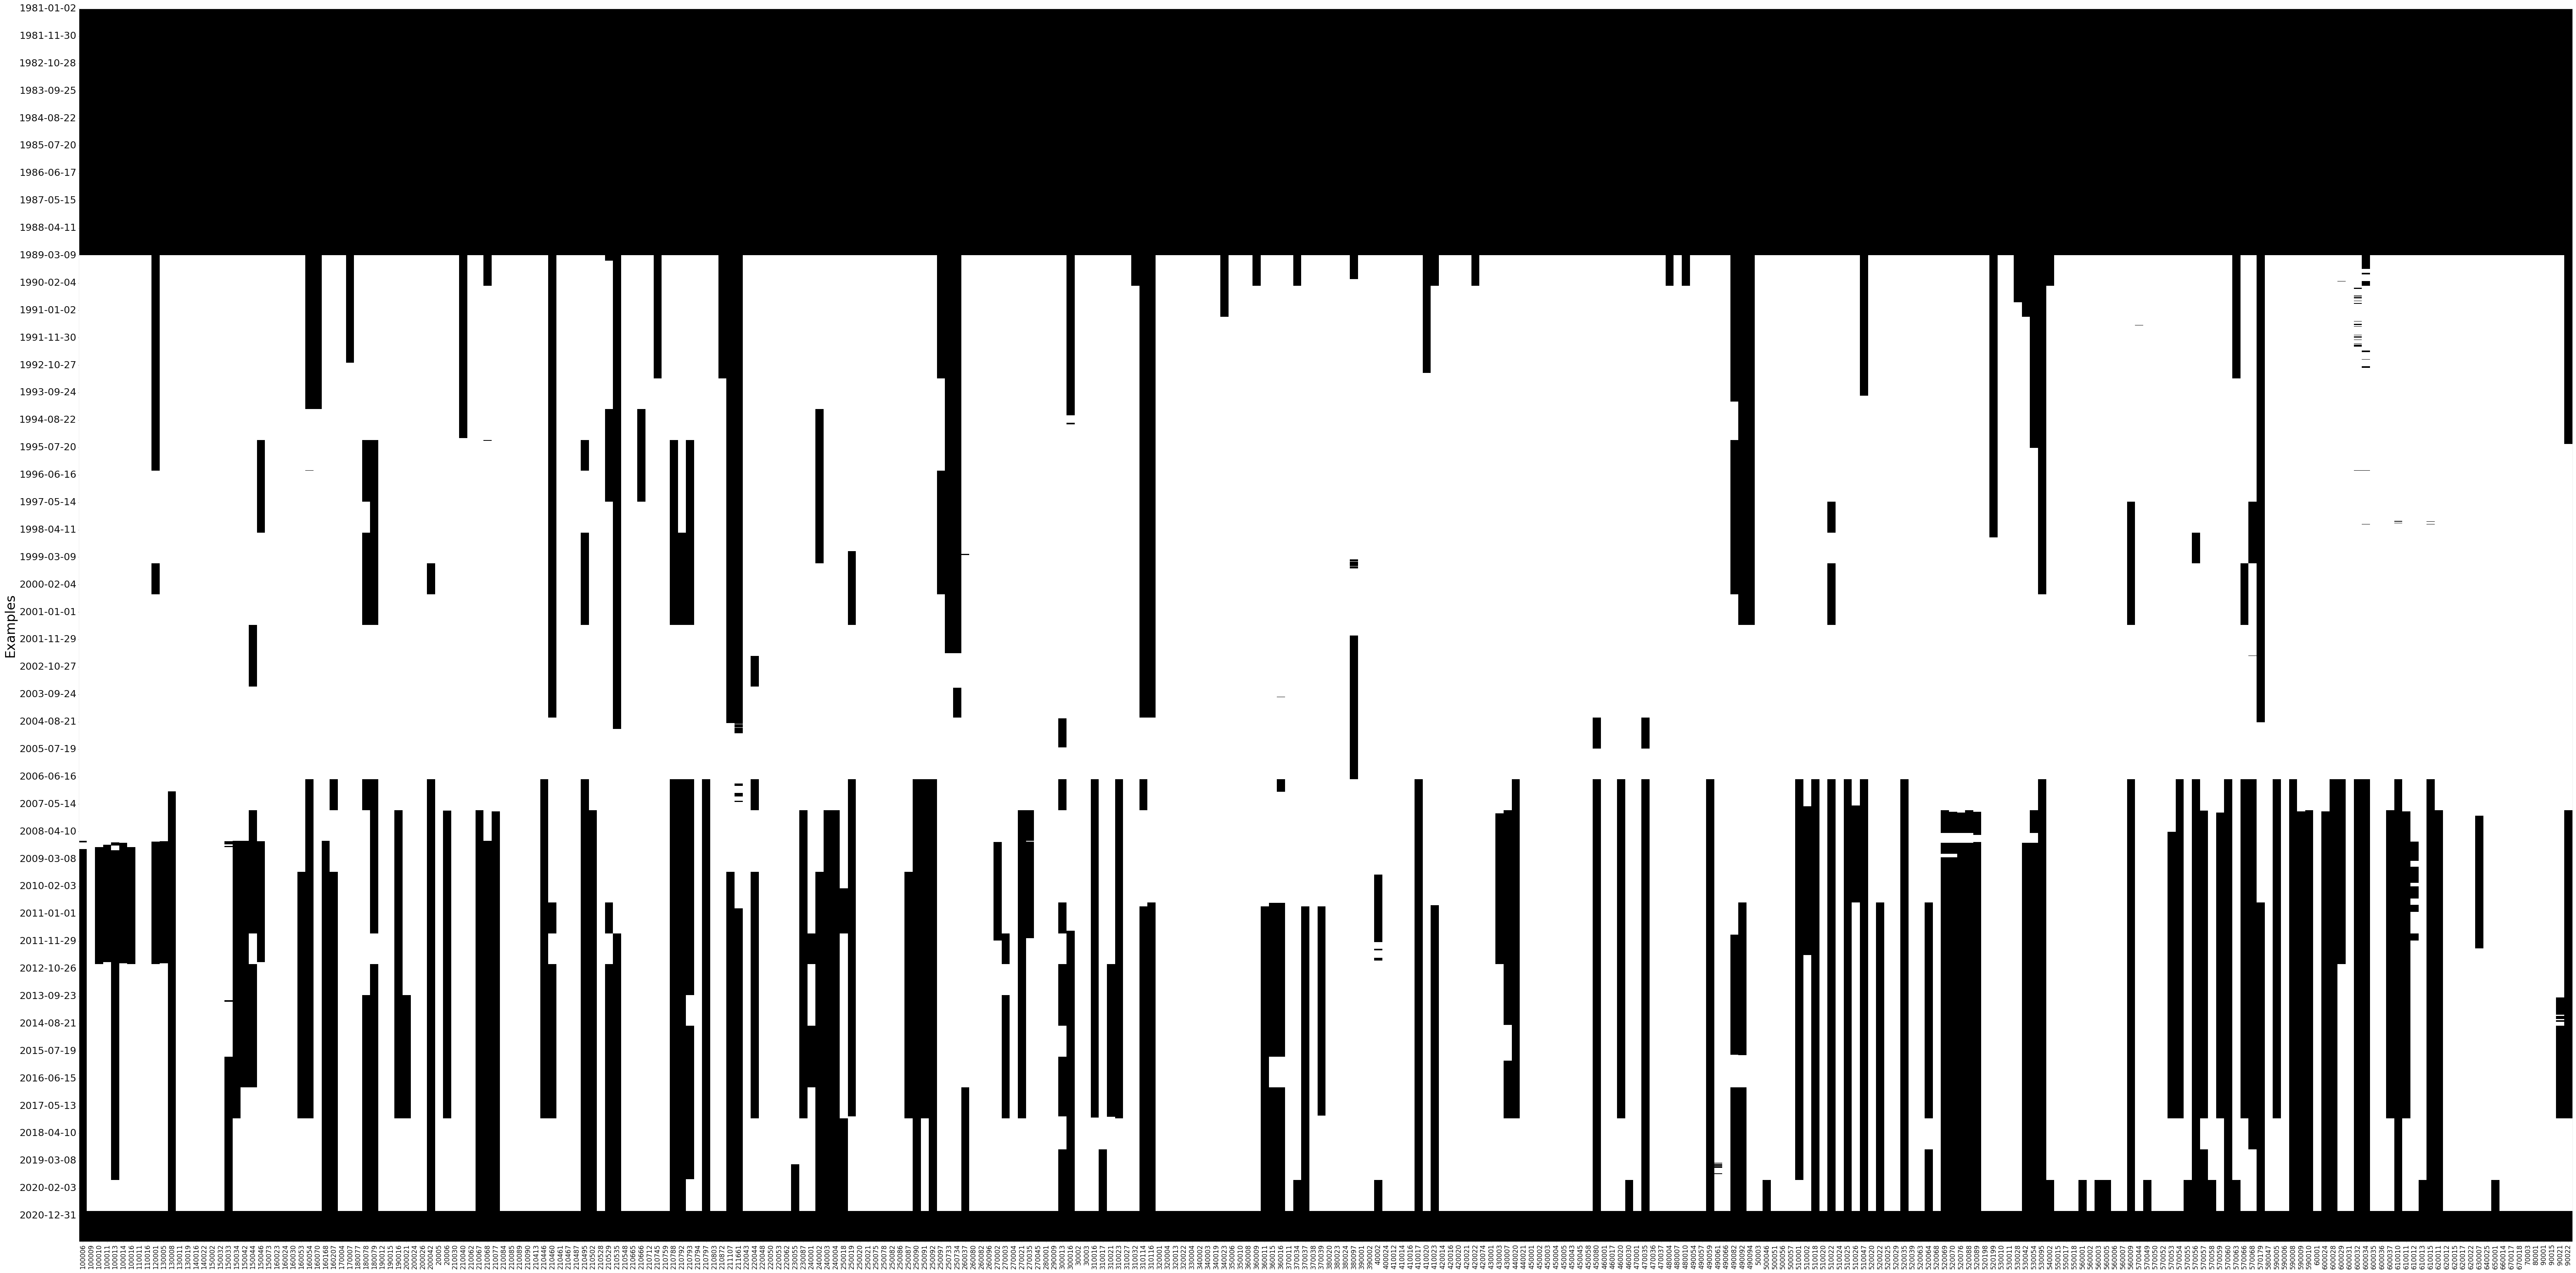

In [29]:

_ = EDA(data=streamflow, save=False).heatmap()

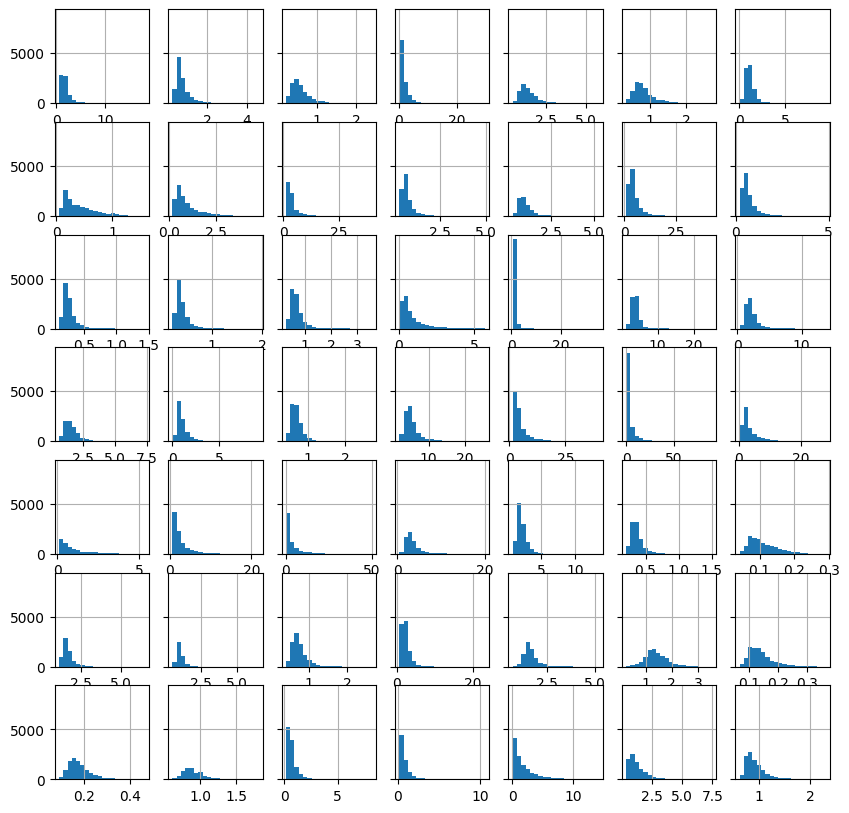

49


In [30]:
st = 0

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

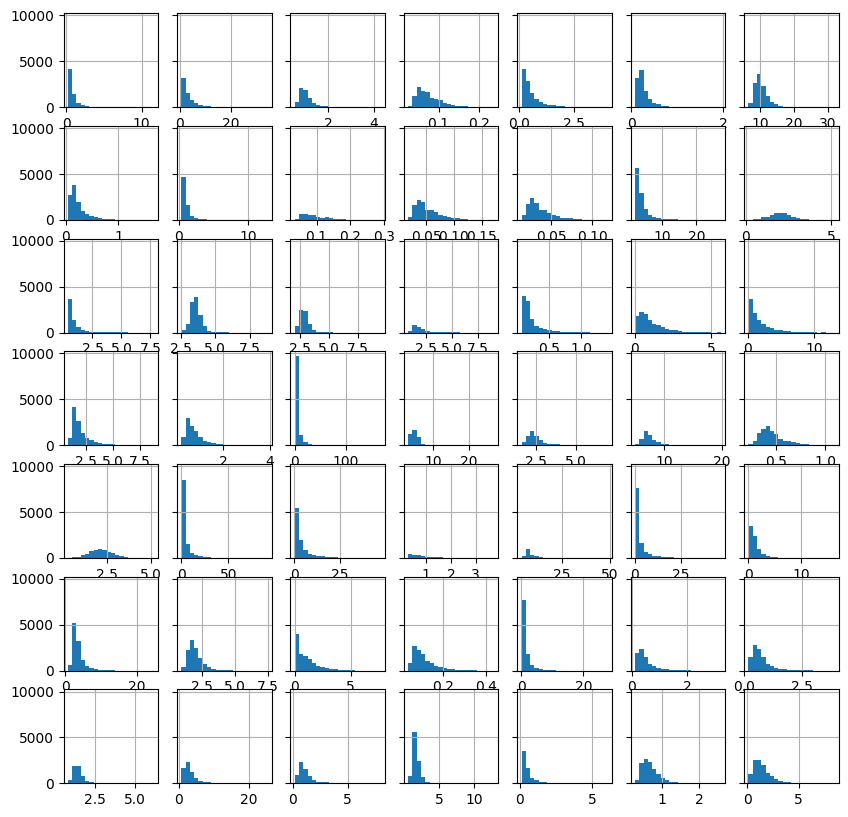

98


In [31]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

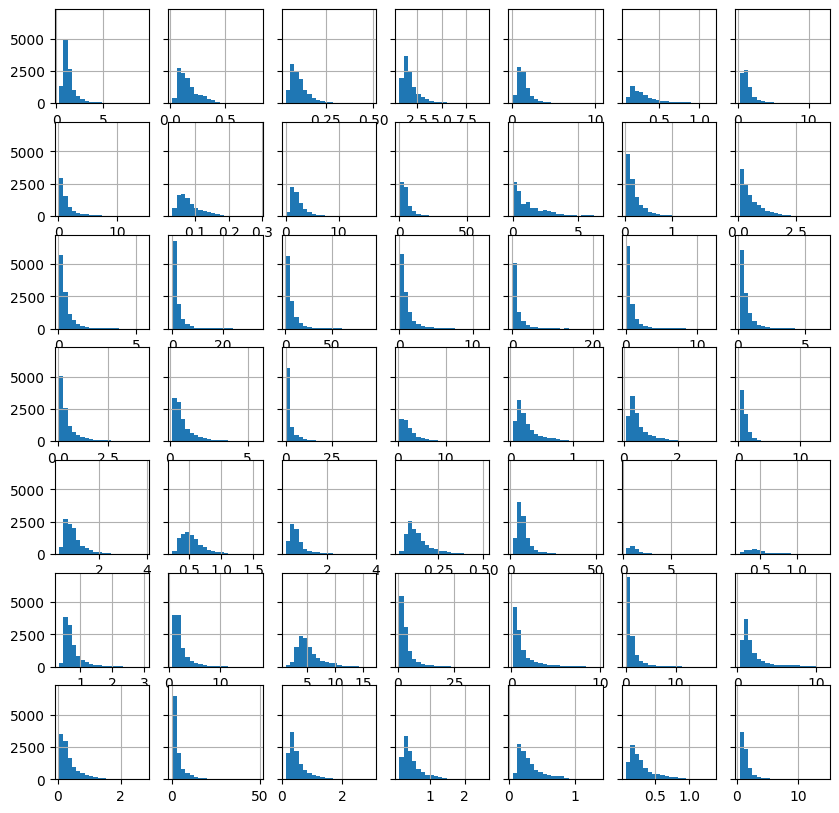

147


In [32]:
st = 98

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

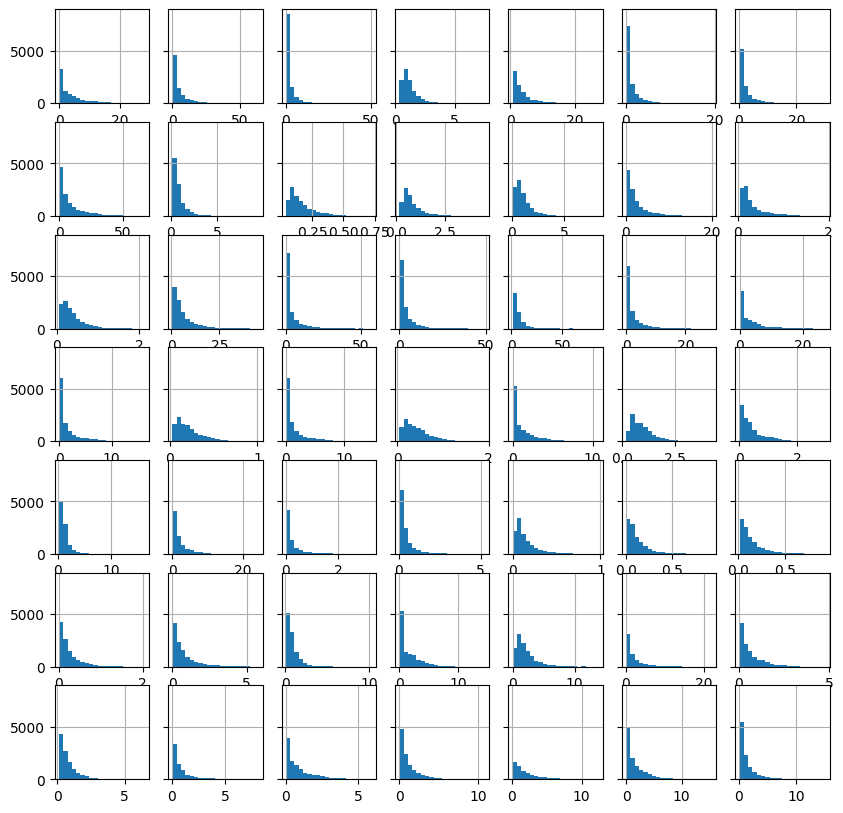

196


In [33]:
st = 147

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

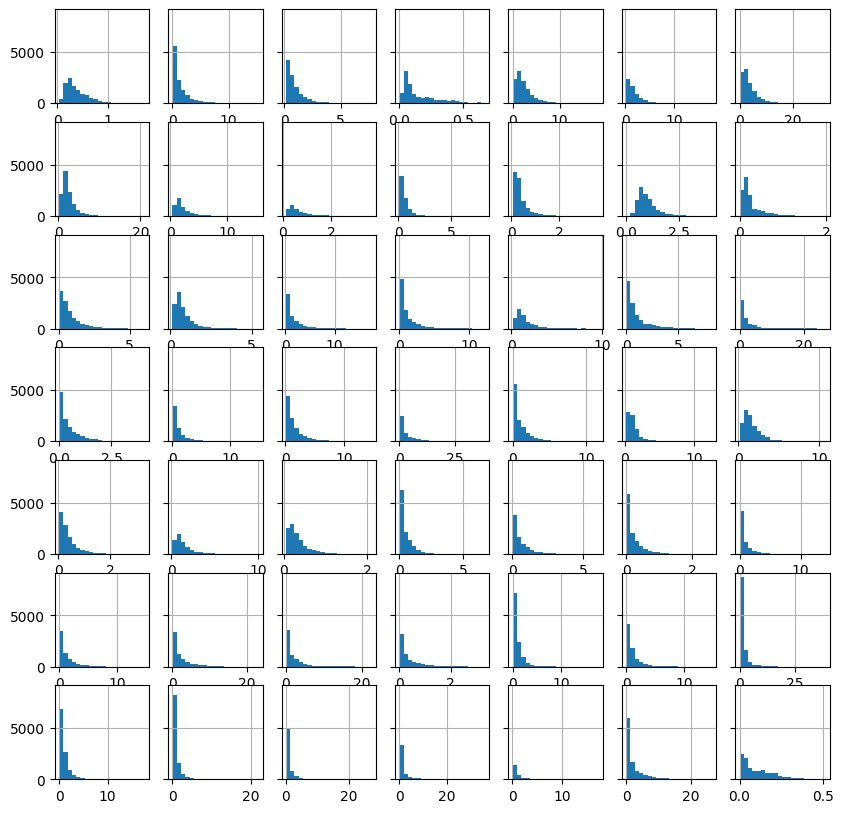

245


In [34]:
st = 196

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

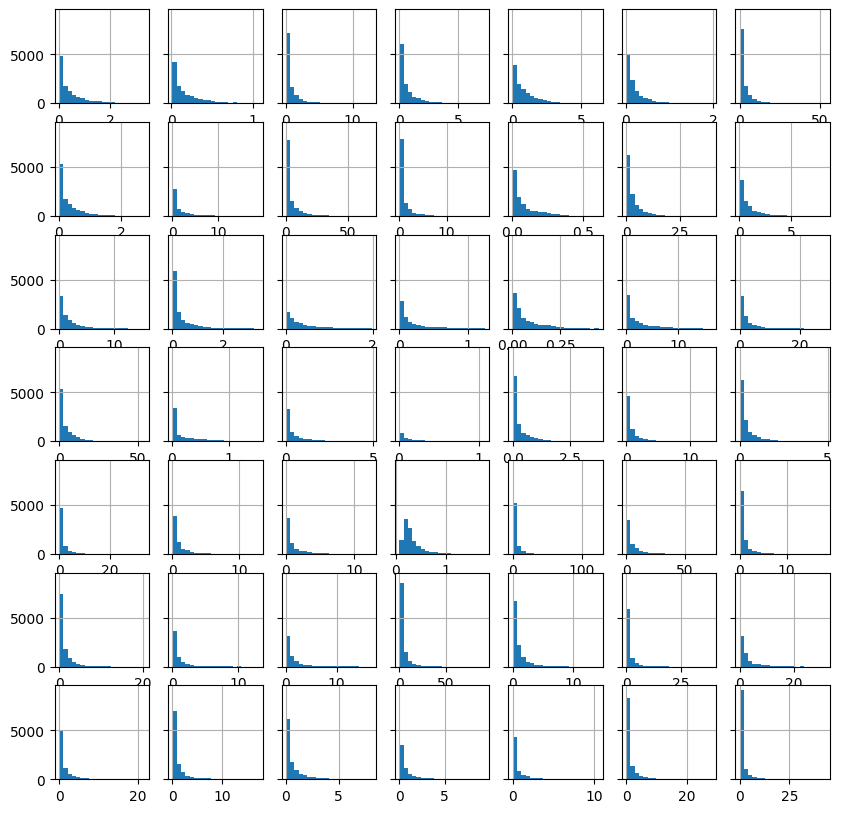

294


In [35]:
st = 245

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

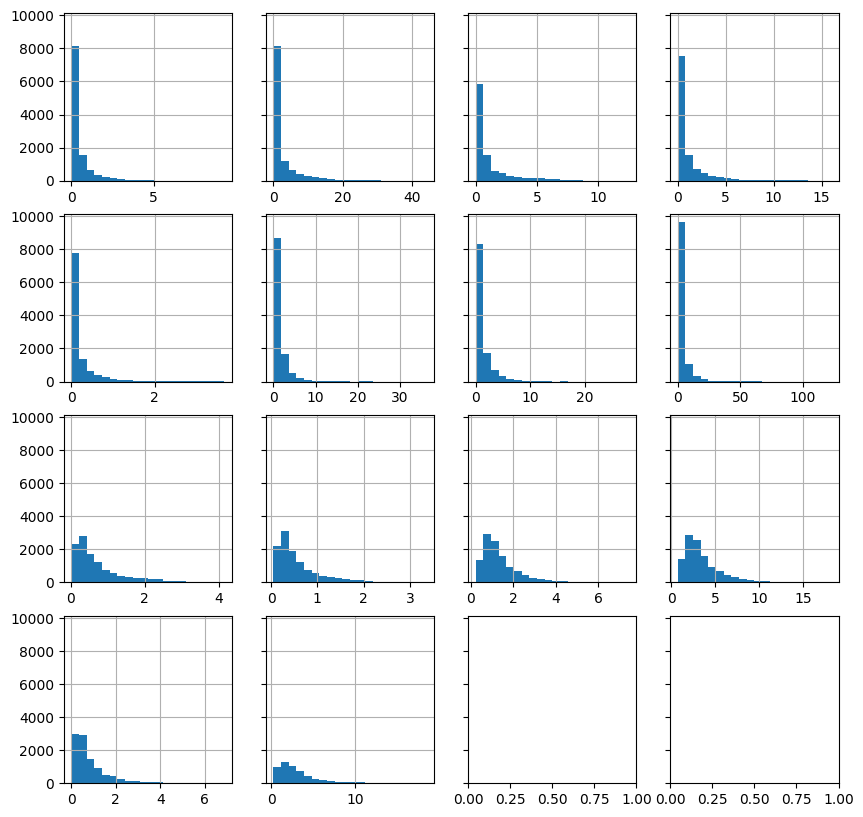

308


In [36]:
st = 294

fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):

    if idx>=308:
        break

    hist(streamflow.iloc[:, idx].values.reshape(-1,),
     bins=20,
     ax=ax,
     show=False
    )
    
    idx += 1

plt.show()
print(idx)

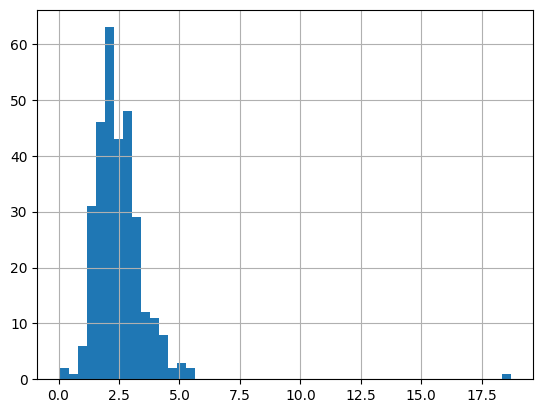

In [37]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

#### potential evapotranspiration

(14609, 308)


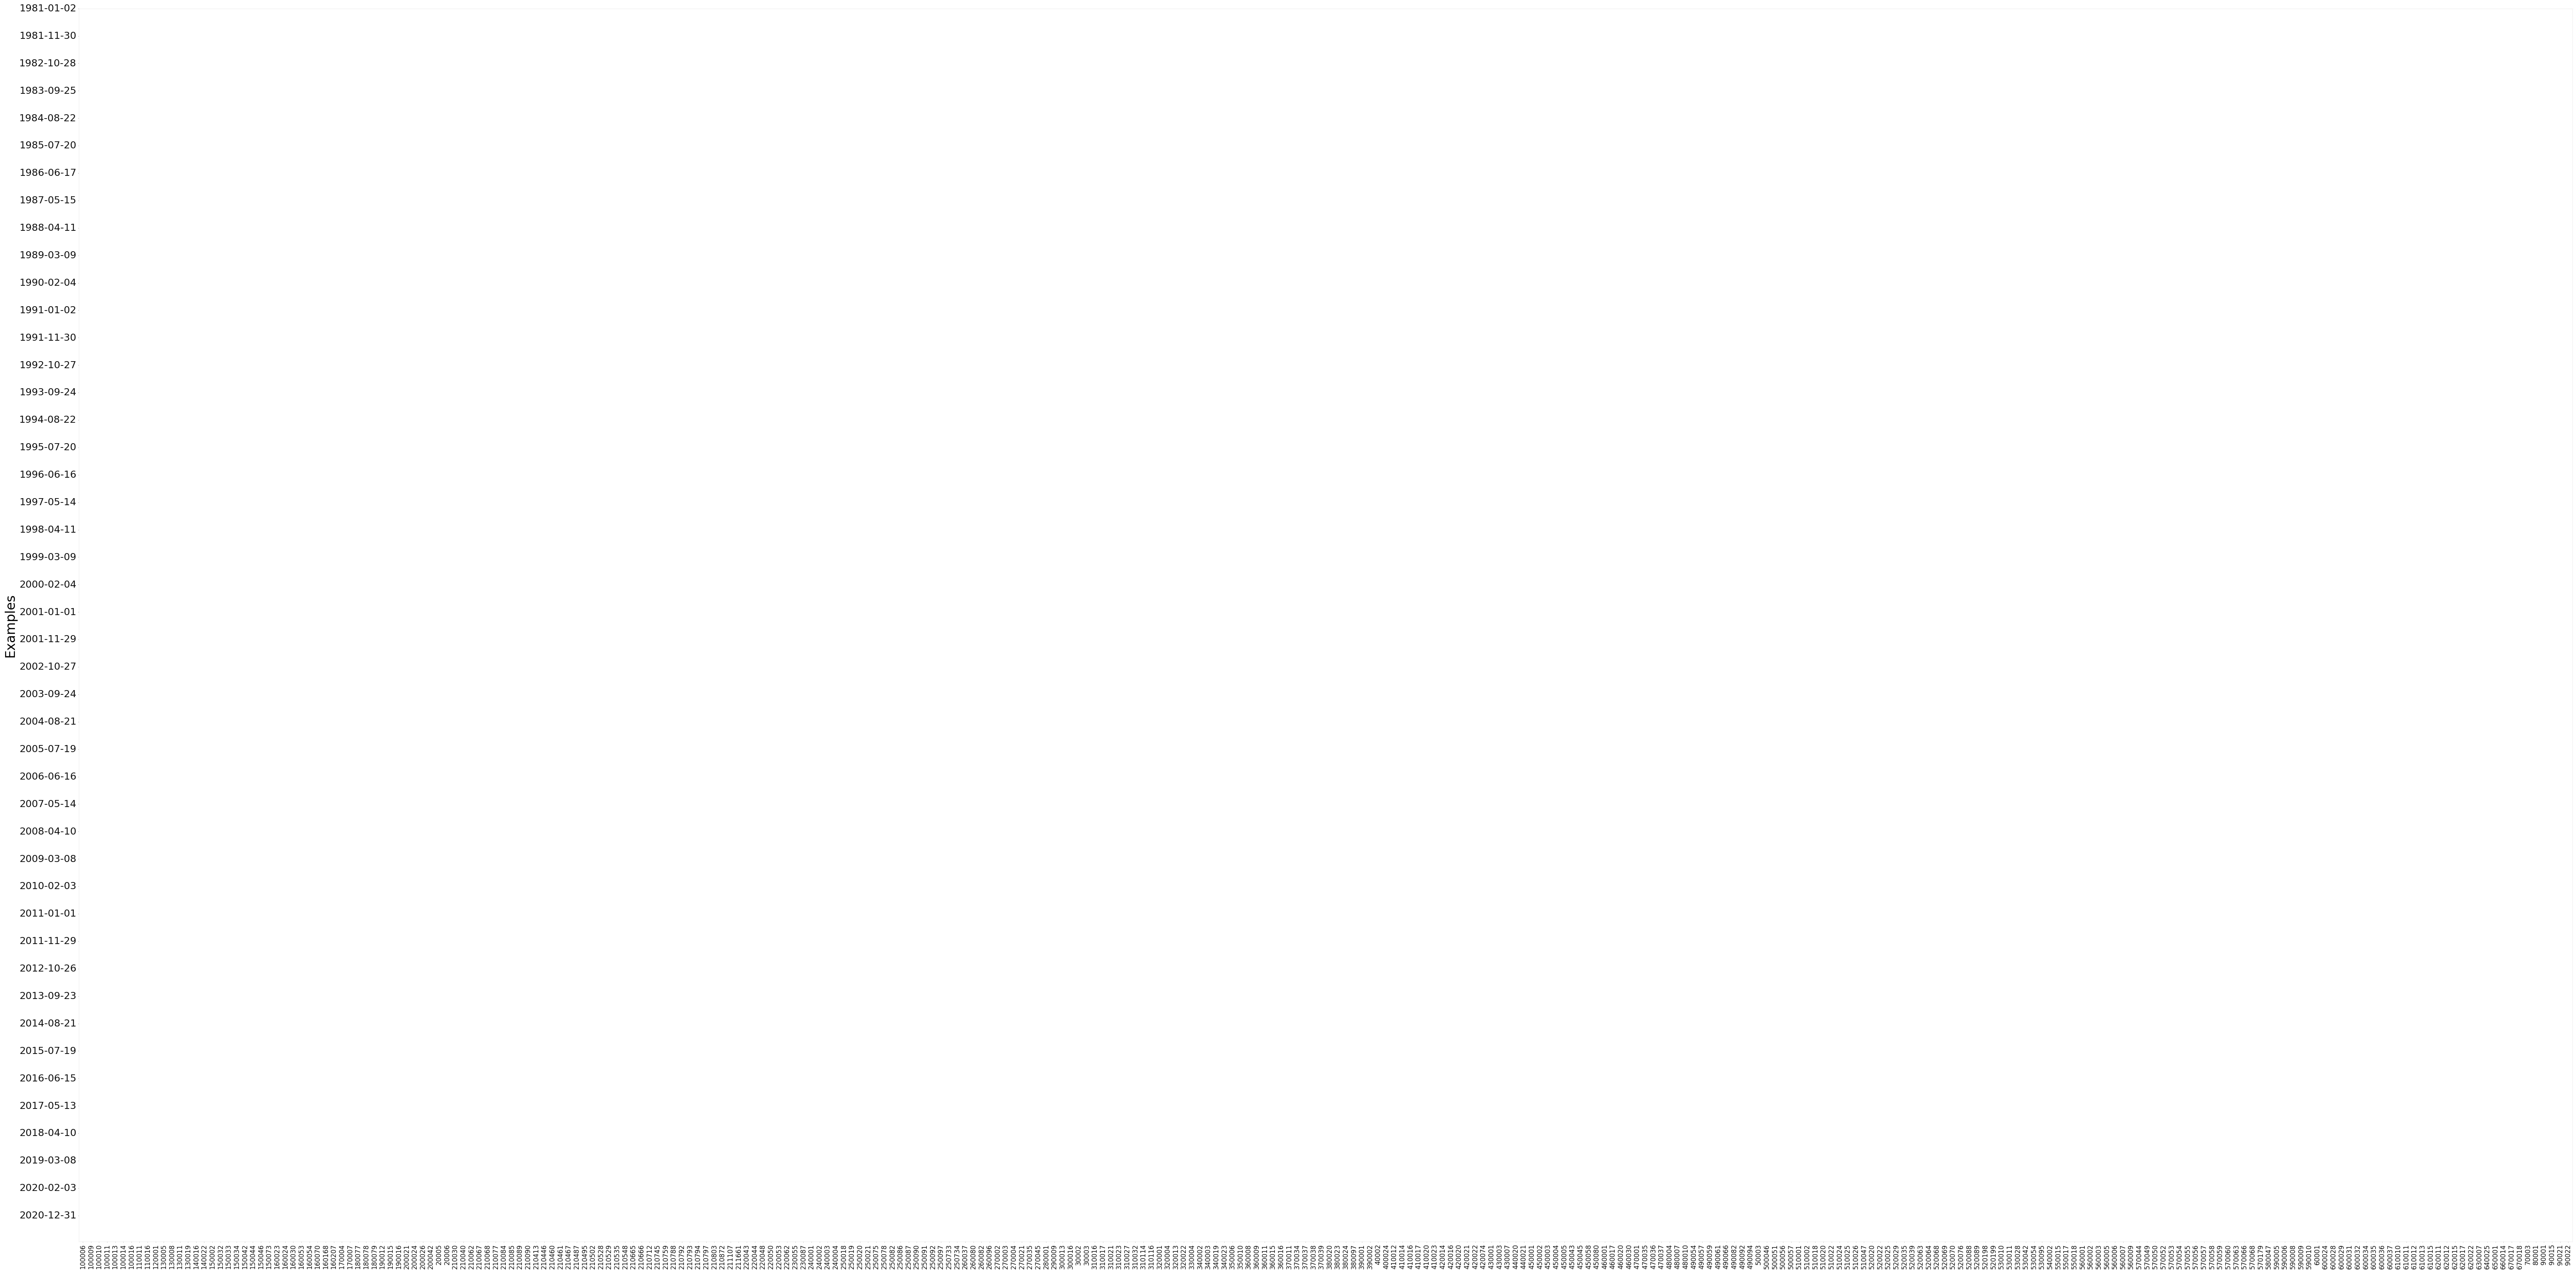

In [41]:
pet = dataset.fetch(dynamic_features = 'potential_evaporation_sum', as_dataframe=True)
pet = pet.reset_index()
pet.index = pd.to_datetime(pet.pop('time'))
pet.pop('dynamic_features')
print(pet.shape) 
_ = EDA(data=pet, save=False).heatmap()

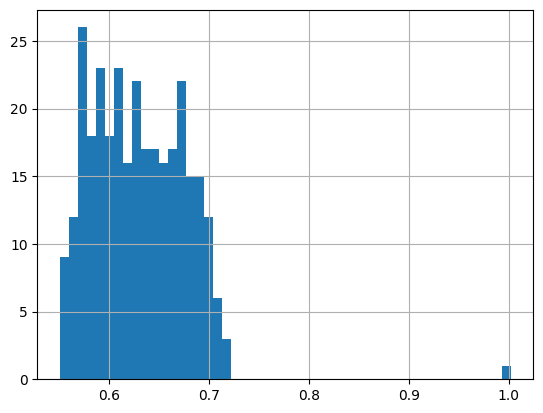

In [42]:
_ = hist(pet.skew().values.reshape(-1,), bins=50)

#### Air Temperature

(14609, 308)


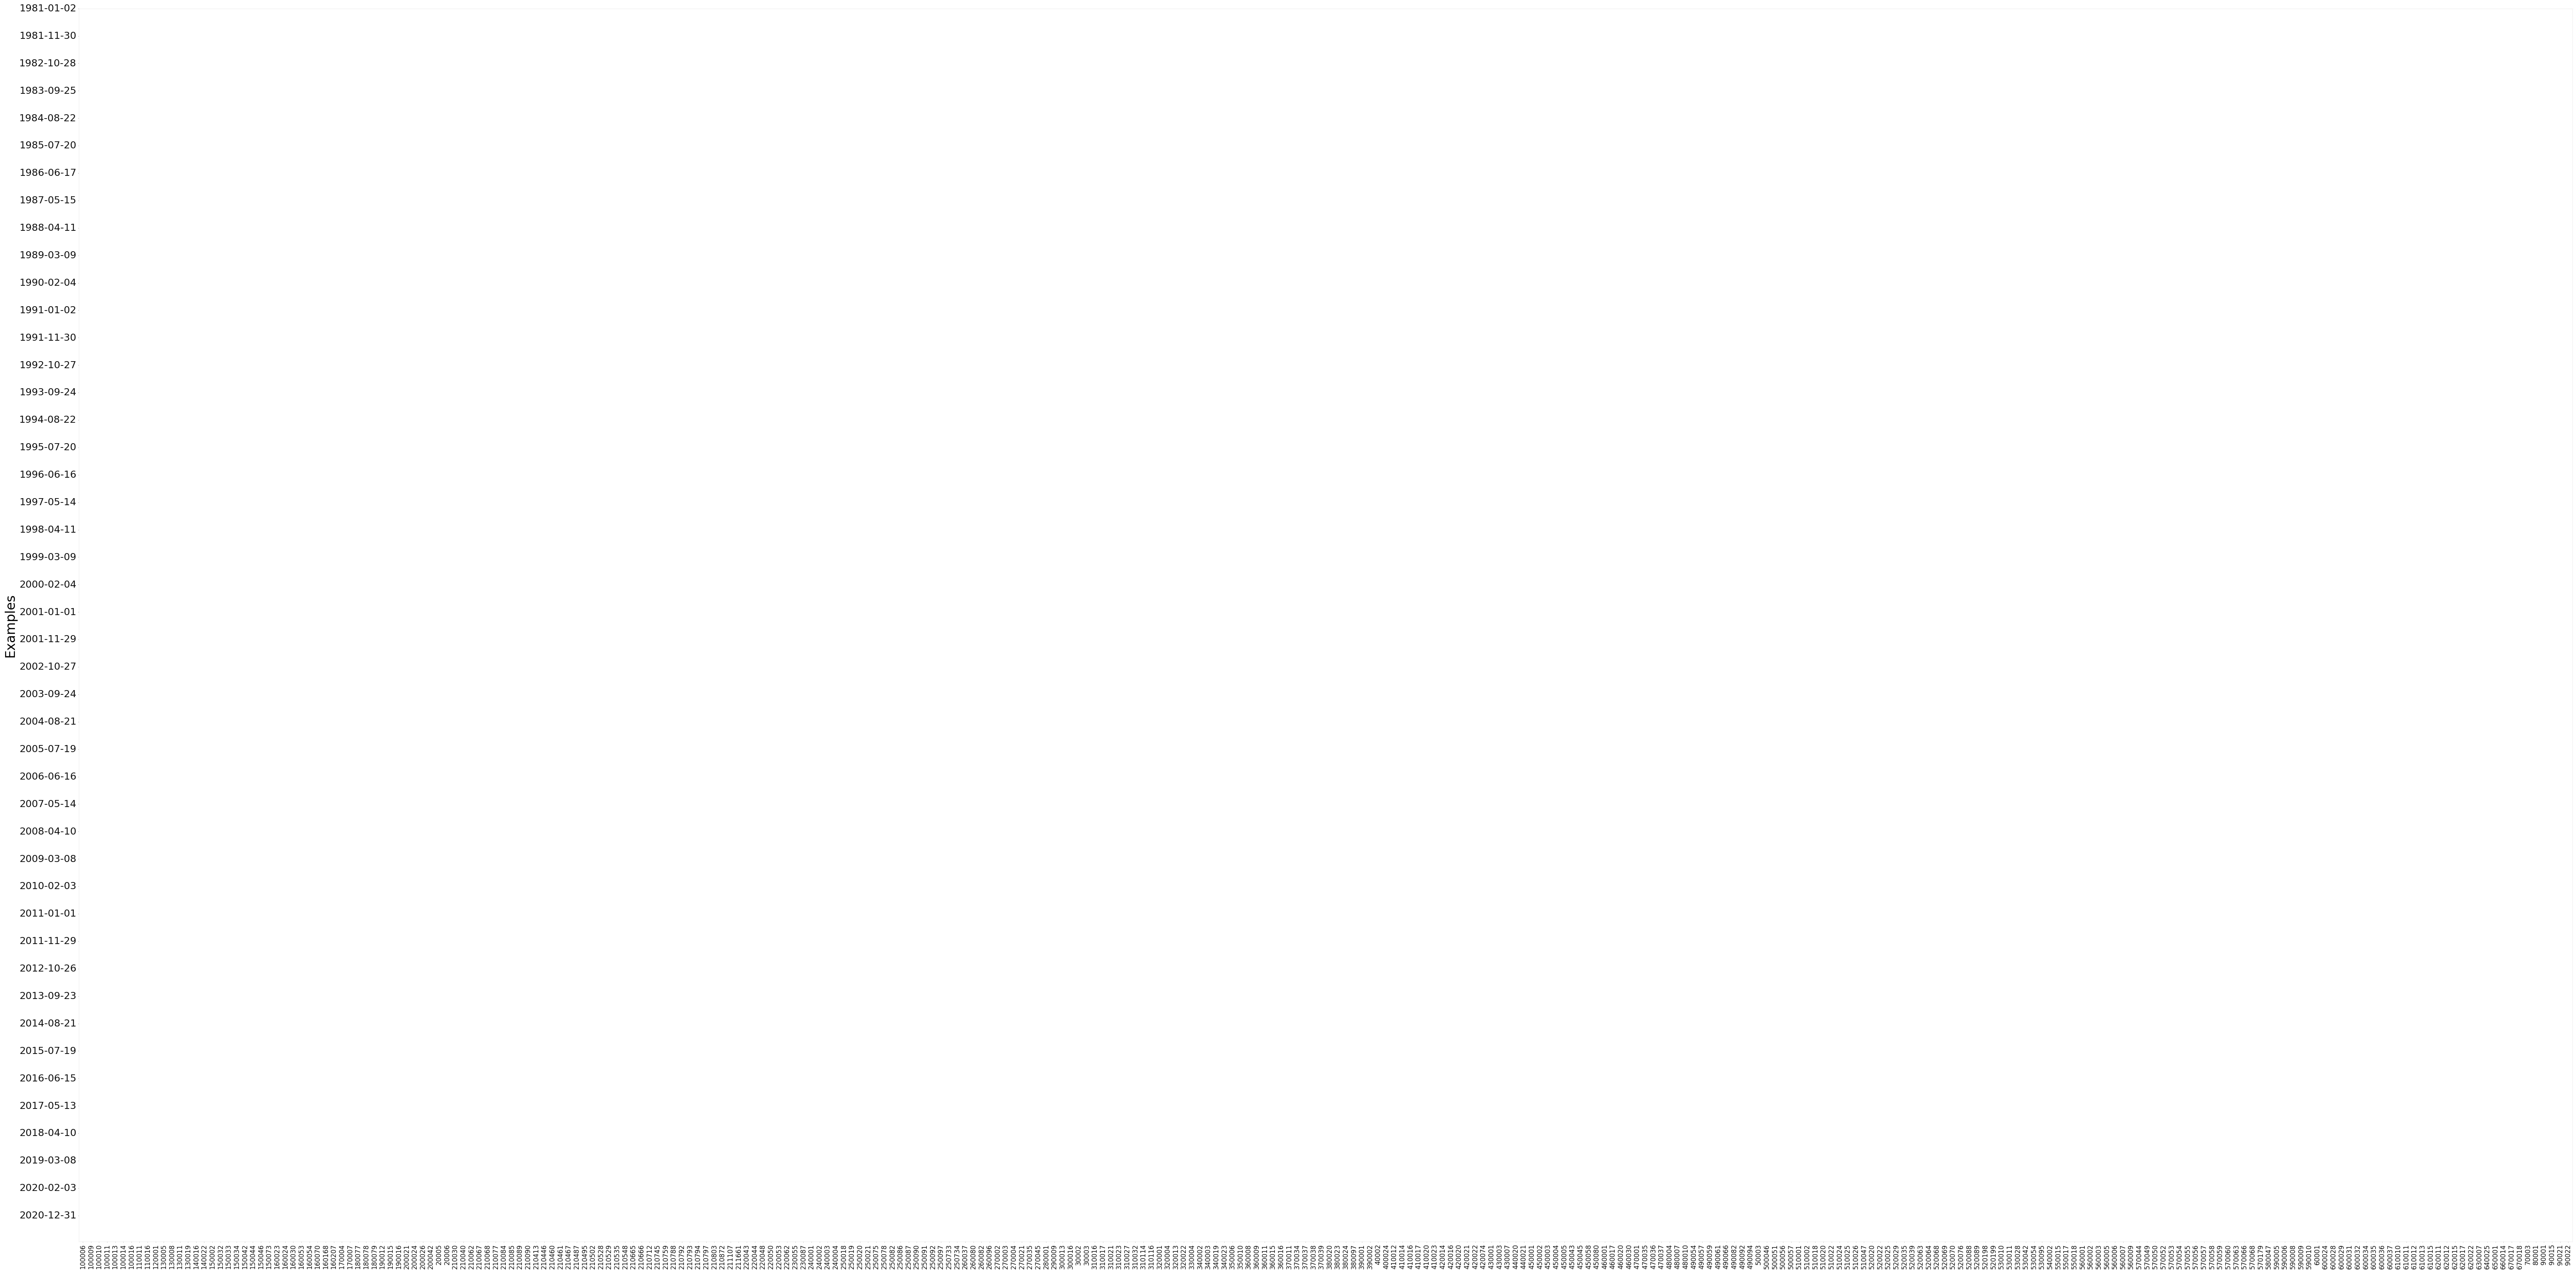

In [44]:
temp = dataset.fetch(dynamic_features = 'temperature_2m_mean', as_dataframe=True)
temp = temp.reset_index()
temp.index = pd.to_datetime(temp.pop('time'))
temp.pop('dynamic_features') 

print(temp.shape)

_ = EDA(data=temp, save=False).heatmap()

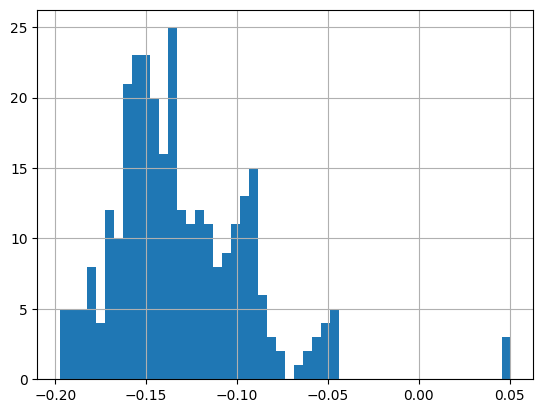

In [45]:

_ = hist(temp.skew().values.reshape(-1,), bins=50)

#### Precipitation


(14609, 308)


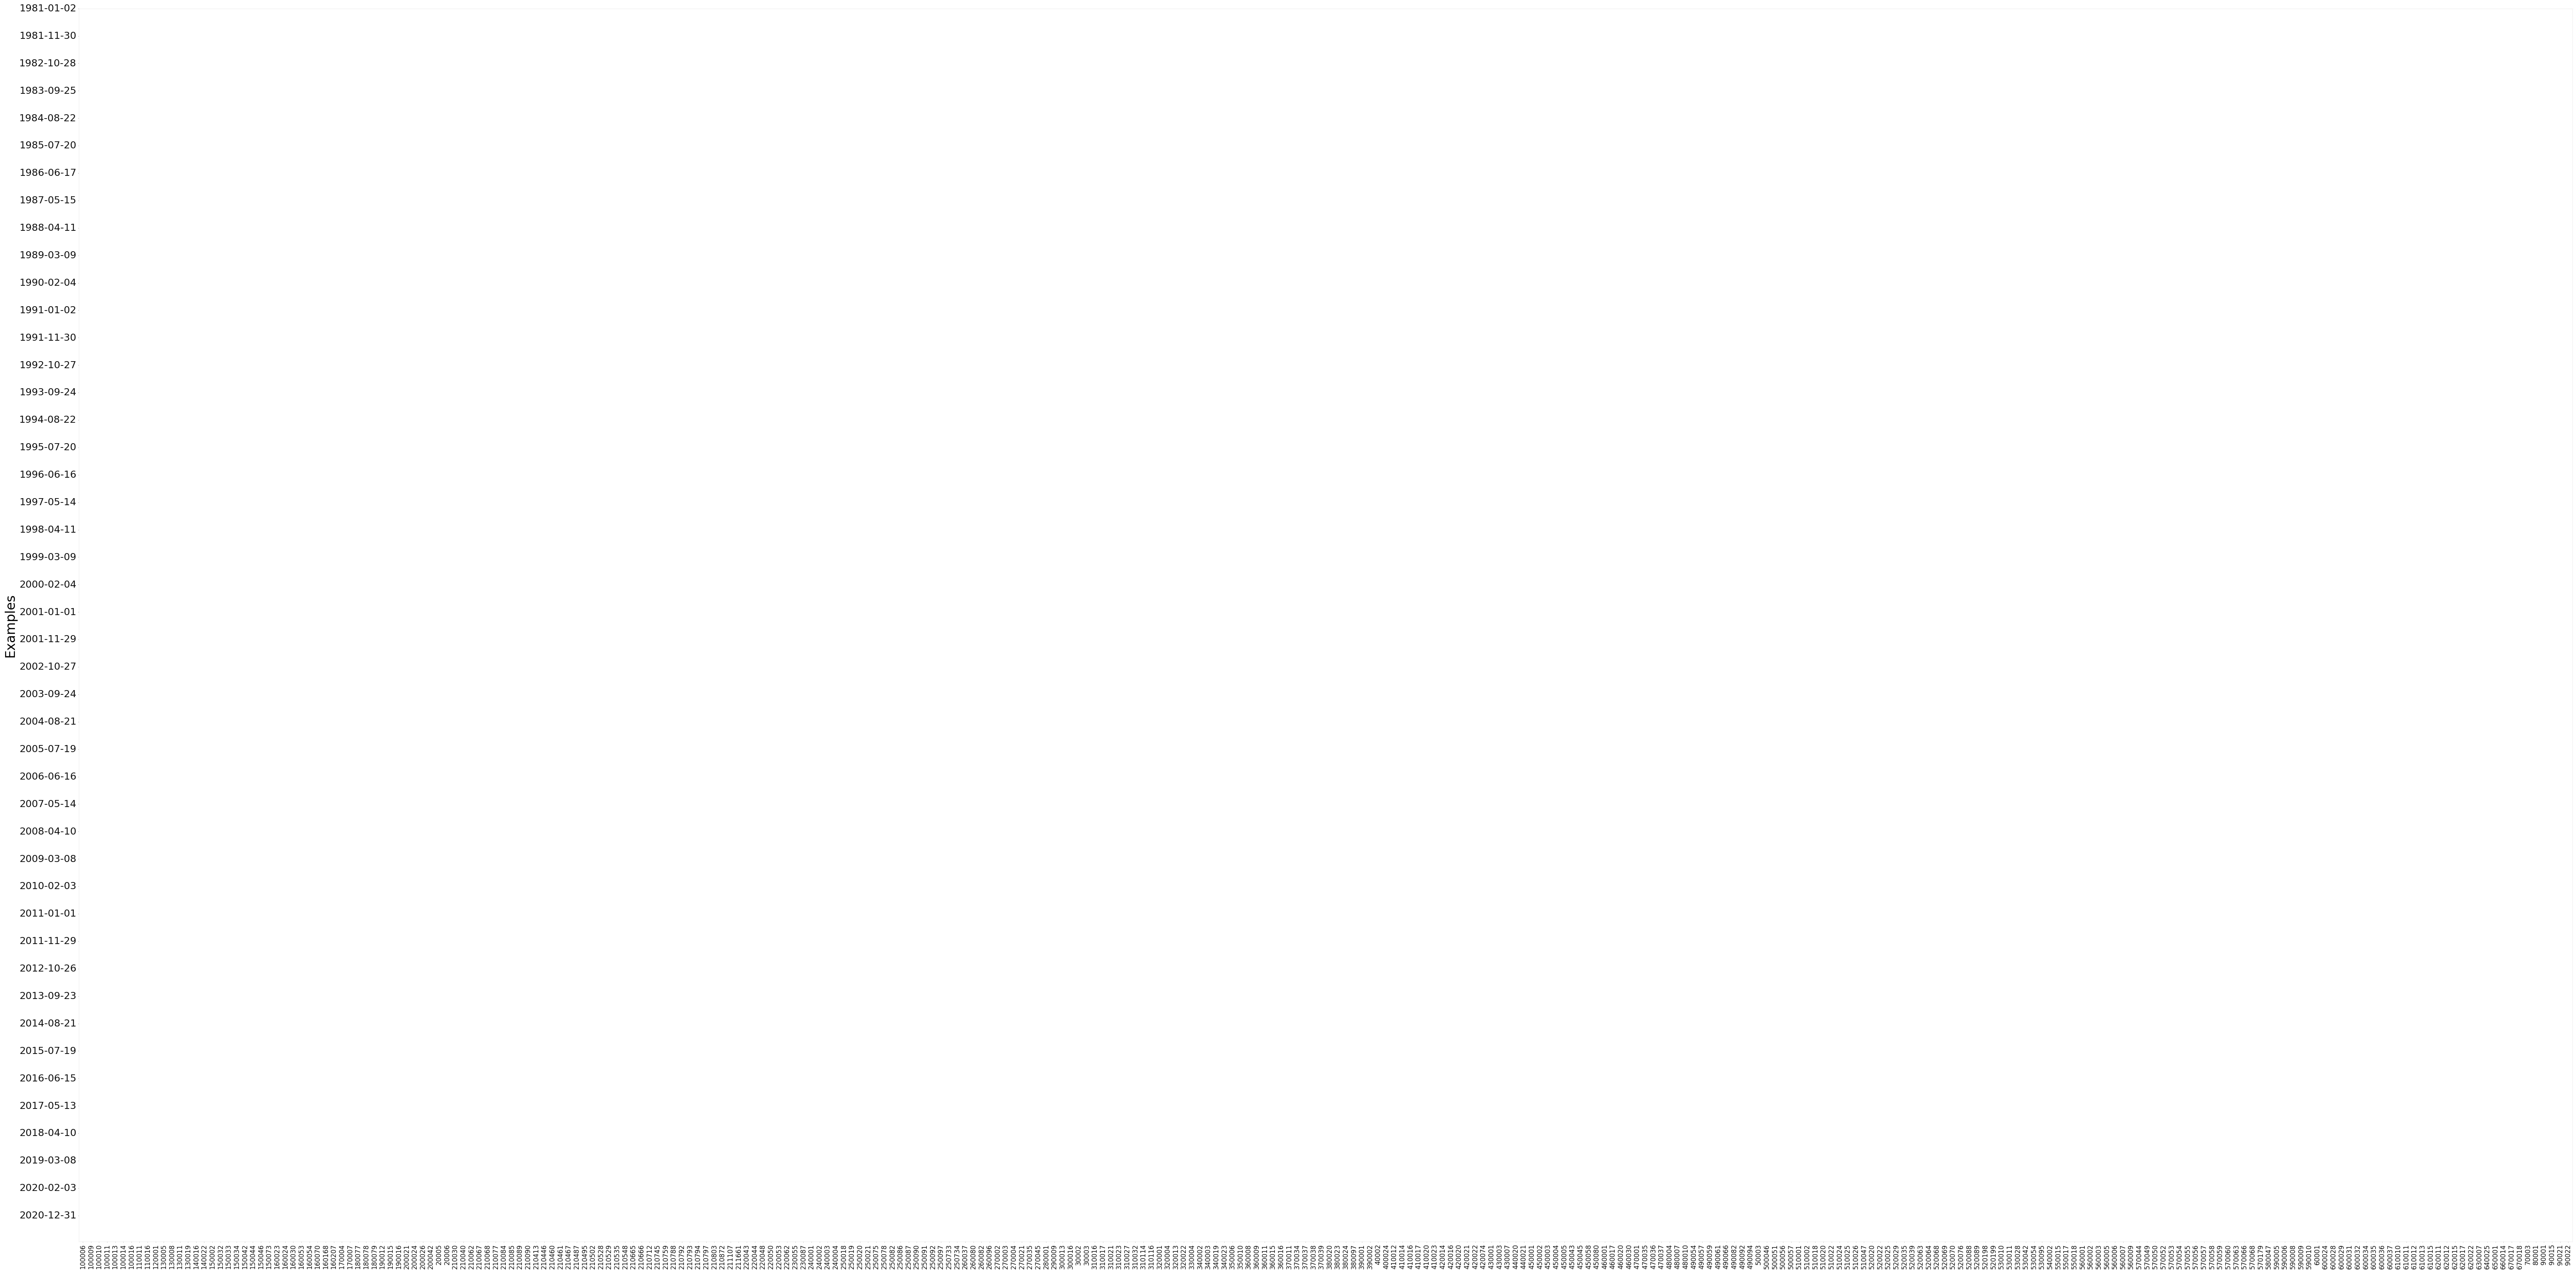

In [48]:
pcp = dataset.fetch(dynamic_features = 'total_precipitation_sum', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
_ = EDA(data=pcp, save=False).heatmap()

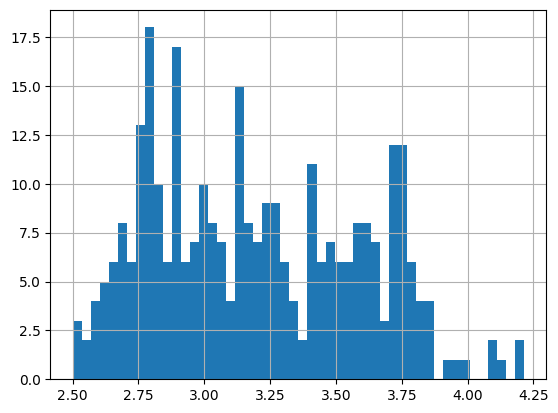

In [49]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)